In [1]:
# Import packages

%matplotlib inline  

import json
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

# Clustering the Employees

## 1. Import data

In [2]:
# Demographic And Personal Features of Employee:
commute_distance = pd.read_csv("https://raw.githubusercontent.com/ygong10/data/main/work_home.csv")
sex = pd.read_csv("https://raw.githubusercontent.com/ygong10/data/main/sex.csv")
age = pd.read_csv("https://raw.githubusercontent.com/ygong10/data/main/age.csv")
ethnic = pd.read_csv("https://raw.githubusercontent.com/ygong10/data/main/ethnic.csv")
household_composition = pd.read_csv("https://raw.githubusercontent.com/ygong10/data/main/household_composition.csv")
qualification = pd.read_csv("https://raw.githubusercontent.com/ygong10/data/main/qualification.csv")
deprivation = pd.read_csv("https://raw.githubusercontent.com/ygong10/data/main/deprivation.csv")
occupation = pd.read_csv("https://raw.githubusercontent.com/ygong10/data/main/occupation_msoa.csv")

### Commute Distance

In [3]:
commute_distance.head(3)

Middle layer Super Output Areas Code Middle layer Super Output Areas  \
0                            E02000001              City of London 001   
1                            E02000002        Barking and Dagenham 001   
2                            E02000003        Barking and Dagenham 002   

   Does_not_apply  Less_than_2km  2km_to_less_than_5km  5km_to_less_than_10km  \
0            3232            676                   385                    241   
1            5043            161                   474                    394   
2            6304            311                   603                    541   

   10km_to_less_than_20km  20km_to_less_than_30km  30km_to_less_than_40km  \
0                      82                      15                       7   
1                     472                     197                      65   
2                     860                     310                      61   

   40km_to_less_than_60km  60km_and_over  outside_the_UK  \
0                       9             28             303   
1                      20             26             751   
2                      17             44            1155   

   Works_mainly_from_home  Total  
0                    3602   8580  
1                     678   8281  
2                    1336  11542

In [4]:
commute_distance['distance_less_than_10km']= (commute_distance['Less_than_2km']+commute_distance['2km_to_less_than_5km']+commute_distance['5km_to_less_than_10km'])/commute_distance['Total']
commute_distance['distance_10km_to_30km']= (commute_distance['10km_to_less_than_20km']+commute_distance['20km_to_less_than_30km'])/commute_distance['Total']
commute_distance['distance_30km_to_60km']= (commute_distance['30km_to_less_than_40km']+commute_distance['40km_to_less_than_60km'])/commute_distance['Total']
commute_distance['distance_more_than_60km']= commute_distance['60km_and_over']/commute_distance['Total']
commute_distance['Works_from_home']= commute_distance['Works_mainly_from_home']/commute_distance['Total']

In [5]:
commute_distance.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas', 'Does_not_apply', 'Less_than_2km',
       '2km_to_less_than_5km', '5km_to_less_than_10km',
       '10km_to_less_than_20km', '20km_to_less_than_30km',
       '30km_to_less_than_40km', '40km_to_less_than_60km', '60km_and_over',
       'outside_the_UK', 'Works_mainly_from_home', 'Total',
       'distance_less_than_10km', 'distance_10km_to_30km',
       'distance_30km_to_60km', 'distance_more_than_60km', 'Works_from_home'],
      dtype='object')

In [6]:
com_dis = commute_distance[['Middle layer Super Output Areas Code','distance_less_than_10km', 
                            'distance_10km_to_30km', 'distance_30km_to_60km', 'distance_more_than_60km', 
                            'Works_from_home']]

### Sex

In [7]:
sex.head(3)

Middle layer Super Output Areas Code Middle layer Super Output Areas  \
0                            E02000001              City of London 001   
1                            E02000002        Barking and Dagenham 001   
2                            E02000003        Barking and Dagenham 002   

   Female  Male  Total  
0    3861  4722   8583  
1    4362  3919   8281  
2    5834  5708  11542

In [8]:
sex['Female']= sex['Female']/sex['Total']
sex['Male']= sex['Male']/sex['Total']

In [9]:
sex.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas', 'Female', 'Male', 'Total'],
      dtype='object')

In [10]:
gender = sex[['Middle layer Super Output Areas Code',
              'Female', 'Male']]

### Age

In [11]:
age.head(3)

Middle layer Super Output Areas Code Middle layer Super Output Areas  \
0                            E02000001              City of London 001   
1                            E02000002        Barking and Dagenham 001   
2                            E02000003        Barking and Dagenham 002   

   Aged 15 years and under  Aged 16 to 24 years  Aged 25 to 34 years  \
0                      579                 1149                 2215   
1                     2297                  903                 1185   
2                     2695                 1316                 1849   

   Aged 35 to 49 years  Aged 50 to 64 years  Aged 65 years and over  Total  
0                 1817                 1617                    1206   8583  
1                 1781                 1191                     924   8281  
2                 2488                 1919                    1274  11541

In [12]:
age['Age_16_to_24']= age['Aged 16 to 24 years']/age['Total']
age['Age_25_to_34']= age['Aged 25 to 34 years']/age['Total']
age['Age_35_to_49']= age['Aged 35 to 49 years']/age['Total']
age['Age_50_to_64']= age['Aged 50 to 64 years']/age['Total']
age['Age_65_and_over']= age['Aged 65 years and over']/age['Total']

In [13]:
age.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas', 'Aged 15 years and under',
       'Aged 16 to 24 years', 'Aged 25 to 34 years', 'Aged 35 to 49 years',
       'Aged 50 to 64 years', 'Aged 65 years and over', 'Total',
       'Age_16_to_24', 'Age_25_to_34', 'Age_35_to_49', 'Age_50_to_64',
       'Age_65_and_over'],
      dtype='object')

In [14]:
age = age[['Middle layer Super Output Areas Code', 'Age_16_to_24', 'Age_25_to_34', 
           'Age_35_to_49', 'Age_50_to_64', 'Age_65_and_over']]

### Ethnic

In [15]:
ethnic.head(3)

Middle layer Super Output Areas Code Middle layer Super Output Areas  \
0                            E02000001              City of London 001   
1                            E02000002        Barking and Dagenham 001   
2                            E02000003        Barking and Dagenham 002   

   Asian_Asian_British_or_Asian_Welsh  \
0                                1445   
1                                1842   
2                                4032   

   Black_Black_British_Black_Welsh_Caribbean_or_African  \
0                                                233      
1                                               1737      
2                                               1802      

   Mixed_or_Multiple_ethnic_groups  \
0                              469   
1                              408   
2                              484   

   White_English_Welsh_Scottish_Northern_Irish_or_British  White_Irish  \
0                                               3649               185   
1                                               3014                83   
2                                               2956               111   

   White_Gypsy_or_Irish_Traveller_Roma_or_Other_White  Other_ethnic_group  \
0                                               2121                  483   
1                                                946                  251   
2                                               1625                  533   

   Total  
0   8585  
1   8281  
2  11543

In [16]:
ethnic['Asian']= ethnic['Asian_Asian_British_or_Asian_Welsh']/ethnic['Total']
ethnic['Black']= ethnic['Black_Black_British_Black_Welsh_Caribbean_or_African']/ethnic['Total']
ethnic['Mixed']= ethnic['Mixed_or_Multiple_ethnic_groups']/ethnic['Total']
ethnic['White']= (ethnic['White_English_Welsh_Scottish_Northern_Irish_or_British']+ethnic['White_Irish']+ethnic['White_Gypsy_or_Irish_Traveller_Roma_or_Other_White'])/ethnic['Total']
ethnic['Other']= ethnic['Other_ethnic_group']/ethnic['Total']

In [17]:
ethnic.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas', 'Asian_Asian_British_or_Asian_Welsh',
       'Black_Black_British_Black_Welsh_Caribbean_or_African',
       'Mixed_or_Multiple_ethnic_groups',
       'White_English_Welsh_Scottish_Northern_Irish_or_British', 'White_Irish',
       'White_Gypsy_or_Irish_Traveller_Roma_or_Other_White',
       'Other_ethnic_group', 'Total', 'Asian', 'Black', 'Mixed', 'White',
       'Other'],
      dtype='object')

In [18]:
ethnic = ethnic[['Middle layer Super Output Areas Code',
                 'Asian', 'Black', 'Mixed', 'White', 'Other']]

### Household Composistion

In [19]:
household_composition.head(3)

Middle layer Super Output Areas Code Middle layer Super Output Areas  \
0                            E02000001              City of London 001   
1                            E02000002        Barking and Dagenham 001   
2                            E02000003        Barking and Dagenham 002   

   One_person_household_Aged_66_years_and_over  One_person_household_Other  \
0                                          494                        2012   
1                                          333                         392   
2                                          443                         531   

   Single_family_household_All_aged_66_years_and_over  \
0                                                201    
1                                                136    
2                                                150    

   Single_family_household_Married_or_civil_partnership_couple_No_children  \
0                                                523                         
1                                                123                         
2                                                272                         

   Single_family_household_Married_or_civil_partnership_couple_Dependent_children  \
0                                                253                                
1                                                563                                
2                                                733                                

   Single_family_household_Married_or_civil_partnership_couple_All_children_non_dependent  \
0                                                 70                                        
1                                                134                                        
2                                                264                                        

   Single_family_household_Cohabiting_couple_family_No_children  \
0                                                598              
1                                                 52              
2                                                 98              

   Single_family_household_Cohabiting_couple_family_With_dependent_children  \
0                                                 57                          
1                                                143                          
2                                                116                          

   Single_family_household_Cohabiting_couple_family_All_children_non_dependent  \
0                                                 10                             
1                                                 30                             
2                                                 23                             

   Single_family_household_Lone_parent_family_With_dependent_children  \
0                                                 90                    
1                                                436                    
2                                                413                    

   Single_family_household_Lone_parent_family_All_children_non_dependent  \
0                                                 85                       
1                                                187                       
2                                                211                       

   Single_family_household_Other_single_family_household_Other_family_composition  \
0                                                 96                                
1                                                 29                                
2                                                 70                                

   Other_household_types_With_dependent_children  \
0                                             31   
1                                            208   
2                                            398   

   Other_household_types_Other_including_all_full_time_students_and_all_a

In [20]:
household_composition.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas',
       'One_person_household_Aged_66_years_and_over',
       'One_person_household_Other',
       'Single_family_household_All_aged_66_years_and_over',
       'Single_family_household_Married_or_civil_partnership_couple_No_children',
       'Single_family_household_Married_or_civil_partnership_couple_Dependent_children',
       'Single_family_household_Married_or_civil_partnership_couple_All_children_non_dependent',
       'Single_family_household_Cohabiting_couple_family_No_children',
       'Single_family_household_Cohabiting_couple_family_With_dependent_children',
       'Single_family_household_Cohabiting_couple_family_All_children_non_dependent',
       'Single_family_household_Lone_parent_family_With_dependent_children',
       'Single_family_household_Lone_parent_family_All_children_non_dependent',
       'Single_family_household_Other_single_family_household_Other_family_composition',
     

In [21]:
household_composition['family_with_children']= (household_composition['Single_family_household_Married_or_civil_partnership_couple_Dependent_children']+household_composition['Single_family_household_Cohabiting_couple_family_With_dependent_children']+household_composition['Single_family_household_Lone_parent_family_With_dependent_children']+household_composition['Other_household_types_With_dependent_children'])/household_composition['total']
household_composition['family_with_no_children']= (household_composition['Single_family_household_Married_or_civil_partnership_couple_No_children']+household_composition['Single_family_household_Cohabiting_couple_family_No_children'])/household_composition['total'] 


In [22]:
household_composition.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas',
       'One_person_household_Aged_66_years_and_over',
       'One_person_household_Other',
       'Single_family_household_All_aged_66_years_and_over',
       'Single_family_household_Married_or_civil_partnership_couple_No_children',
       'Single_family_household_Married_or_civil_partnership_couple_Dependent_children',
       'Single_family_household_Married_or_civil_partnership_couple_All_children_non_dependent',
       'Single_family_household_Cohabiting_couple_family_No_children',
       'Single_family_household_Cohabiting_couple_family_With_dependent_children',
       'Single_family_household_Cohabiting_couple_family_All_children_non_dependent',
       'Single_family_household_Lone_parent_family_With_dependent_children',
       'Single_family_household_Lone_parent_family_All_children_non_dependent',
       'Single_family_household_Other_single_family_household_Other_family_composition',
     

In [23]:
household = household_composition[['Middle layer Super Output Areas Code',
                                   'family_with_children',
                                   'family_with_no_children']]

### Qualification

In [24]:
qualification.head(3)

Middle layer Super Output Areas Code Middle layer Super Output Areas  \
0                            E02000001              City of London 001   
1                            E02000002        Barking and Dagenham 001   
2                            E02000003        Barking and Dagenham 002   

   No_qualifications  Level_1_and_entry_level_qualifications  \
0                529                                     223   
1               1433                                     642   
2               1885                                     917   

   Level_2_qualifications  Apprenticeship  Level_3_qualifications  \
0                     392              80                     708   
1                     786             251                     820   
2                    1102             359                    1250   

   Level_4_qualifications_or_above  Other  Does_not_apply  total  
0                             5939    135             579   8585  
1                             1850    203            2297   8282  
2                             3010    326            2695  11544

In [25]:
qualification['no_qualification']= qualification['No_qualifications']/qualification['total']
qualification['qualification_under_level4']= (qualification['Level_1_and_entry_level_qualifications']+qualification['Level_2_qualifications']+qualification['Level_3_qualifications'])/qualification['total']
qualification['qualification_level4_above']= qualification['Level_4_qualifications_or_above']/qualification['total']

In [26]:
qualification.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas', 'No_qualifications',
       'Level_1_and_entry_level_qualifications', 'Level_2_qualifications',
       'Apprenticeship', 'Level_3_qualifications',
       'Level_4_qualifications_or_above', 'Other', 'Does_not_apply', 'total',
       'no_qualification', 'qualification_under_level4',
       'qualification_level4_above'],
      dtype='object')

In [27]:
education = qualification[['Middle layer Super Output Areas Code',
                           'no_qualification', 'qualification_under_level4',
                           'qualification_level4_above']]

### Deprivation

In [28]:
deprivation.head(3)

Middle layer Super Output Areas Code Middle layer Super Output Areas  \
0                            E02000001              City of London 001   
1                            E02000002        Barking and Dagenham 001   
2                            E02000003        Barking and Dagenham 002   

   Household_is_not_deprived_in_any_dimension  \
0                                        2937   
1                                         954   
2                                        1649   

   Household_is_deprived_in_one_dimension  \
0                                    1547   
1                                    1085   
2                                    1467   

   Household_is_deprived_in_two_dimensions  \
0                                      347   
1                                      613   
2                                      667   

   Household_is_deprived_in_three_dimensions  \
0                                         75   
1                                        194   
2                                        145   

   Household_is_deprived_in_four_dimensions  total  
0                                         8   4914  
1                                        24   2870  
2                                         2   3930

In [29]:
deprivation['not_deprived']= deprivation['Household_is_not_deprived_in_any_dimension']/deprivation['total']

In [30]:
deprivation.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas',
       'Household_is_not_deprived_in_any_dimension',
       'Household_is_deprived_in_one_dimension',
       'Household_is_deprived_in_two_dimensions',
       'Household_is_deprived_in_three_dimensions',
       'Household_is_deprived_in_four_dimensions', 'total', 'not_deprived'],
      dtype='object')

In [31]:
income = deprivation[['Middle layer Super Output Areas Code', 'not_deprived']]

### Occupation

In [32]:
occupation.head(3)

Middle layer Super Output Areas Code Middle layer Super Output Areas  \
0                            E02000001              City of London 001   
1                            E02000002        Barking and Dagenham 001   
2                            E02000003        Barking and Dagenham 002   

   1_Managers_directors_and_senior_officials  2_Professional_occupations  \
0                                       1104                        2349   
1                                        277                         533   
2                                        512                         912   

   3_Associate_professional_and_technical_occupations  \
0                                               1027    
1                                                308    
2                                                539    

   4_Administrative_and_secretarial_occupations  5_Skilled_trades_occupations  \
0                                           267                            97   
1                                           298                           414   
2                                           567                           580   

   6_Caring_leisure_and_other_service_occupations  \
0                                             152   
1                                             378   
2                                             519   

   7_Sales_and_customer_service_occupations  \
0                                       122   
1                                       254   
2                                       427   

   8_Process_plant_and_machine_operatives  9_Elementary_occupations  \
0                                      50                       178   
1                                     300                       478   
2                                     434                       748   

   Does_not_apply  total  
0            3232   8578  
1            5043   8283  
2            6304  11542

In [33]:
occupation['Managers_directors']= occupation['1_Managers_directors_and_senior_officials']/occupation['total']
occupation['Professional_occupations']= occupation['2_Professional_occupations']/occupation['total']
occupation['Technical_occupations']= occupation['3_Associate_professional_and_technical_occupations']/occupation['total']
occupation['Secretarial_occupations']= occupation['4_Administrative_and_secretarial_occupations']/occupation['total']
occupation['Skilled_trades_occupations']= occupation['5_Skilled_trades_occupations']/occupation['total']
occupation['Service_occupations']= occupation['6_Caring_leisure_and_other_service_occupations']/occupation['total']
occupation['Sales_occupations']= occupation['7_Sales_and_customer_service_occupations']/occupation['total']
occupation['Machine_operatives']= occupation['8_Process_plant_and_machine_operatives']/occupation['total']
occupation['Elementary_occupations']= occupation['9_Elementary_occupations']/occupation['total']

In [34]:
occupation.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas',
       '1_Managers_directors_and_senior_officials',
       '2_Professional_occupations',
       '3_Associate_professional_and_technical_occupations',
       '4_Administrative_and_secretarial_occupations',
       '5_Skilled_trades_occupations',
       '6_Caring_leisure_and_other_service_occupations',
       '7_Sales_and_customer_service_occupations',
       '8_Process_plant_and_machine_operatives', '9_Elementary_occupations',
       'Does_not_apply', 'total', 'Managers_directors',
       'Professional_occupations', 'Technical_occupations',
       'Secretarial_occupations', 'Skilled_trades_occupations',
       'Service_occupations', 'Sales_occupations', 'Machine_operatives',
       'Elementary_occupations'],
      dtype='object')

In [35]:
job = occupation[['Middle layer Super Output Areas Code', 'Managers_directors',
       'Professional_occupations', 'Technical_occupations',
       'Secretarial_occupations', 'Skilled_trades_occupations',
       'Service_occupations', 'Sales_occupations', 'Machine_operatives',
       'Elementary_occupations']]

In [36]:
df1 = com_dis.merge(gender, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
df2 = df1.merge(age, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
df3 = df2.merge(ethnic, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
df4 = df3.merge(household, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
df5 = df4.merge(education, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
df6 = df5.merge(income, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
df7 = df6.merge(job, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')

In [37]:
df7.columns

Index(['Middle layer Super Output Areas Code', 'distance_less_than_10km',
       'distance_10km_to_30km', 'distance_30km_to_60km',
       'distance_more_than_60km', 'Works_from_home', 'Female', 'Male',
       'Age_16_to_24', 'Age_25_to_34', 'Age_35_to_49', 'Age_50_to_64',
       'Age_65_and_over', 'Asian', 'Black', 'Mixed', 'White', 'Other',
       'family_with_children', 'family_with_no_children', 'no_qualification',
       'qualification_under_level4', 'qualification_level4_above',
       'not_deprived', 'Managers_directors', 'Professional_occupations',
       'Technical_occupations', 'Secretarial_occupations',
       'Skilled_trades_occupations', 'Service_occupations',
       'Sales_occupations', 'Machine_operatives', 'Elementary_occupations'],
      dtype='object')

In [38]:
data = df7.set_index('Middle layer Super Output Areas Code').copy()

## 2. Exploratory Data Analysis (EDA)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2867 entries, E02000001 to E02007116
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   distance_less_than_10km     2867 non-null   float64
 1   distance_10km_to_30km       2867 non-null   float64
 2   distance_30km_to_60km       2867 non-null   float64
 3   distance_more_than_60km     2867 non-null   float64
 4   Works_from_home             2867 non-null   float64
 5   Female                      2867 non-null   float64
 6   Male                        2867 non-null   float64
 7   Age_16_to_24                2867 non-null   float64
 8   Age_25_to_34                2867 non-null   float64
 9   Age_35_to_49                2867 non-null   float64
 10  Age_50_to_64                2867 non-null   float64
 11  Age_65_and_over             2867 non-null   float64
 12  Asian                       2867 non-null   float64
 13  Black                    

###  

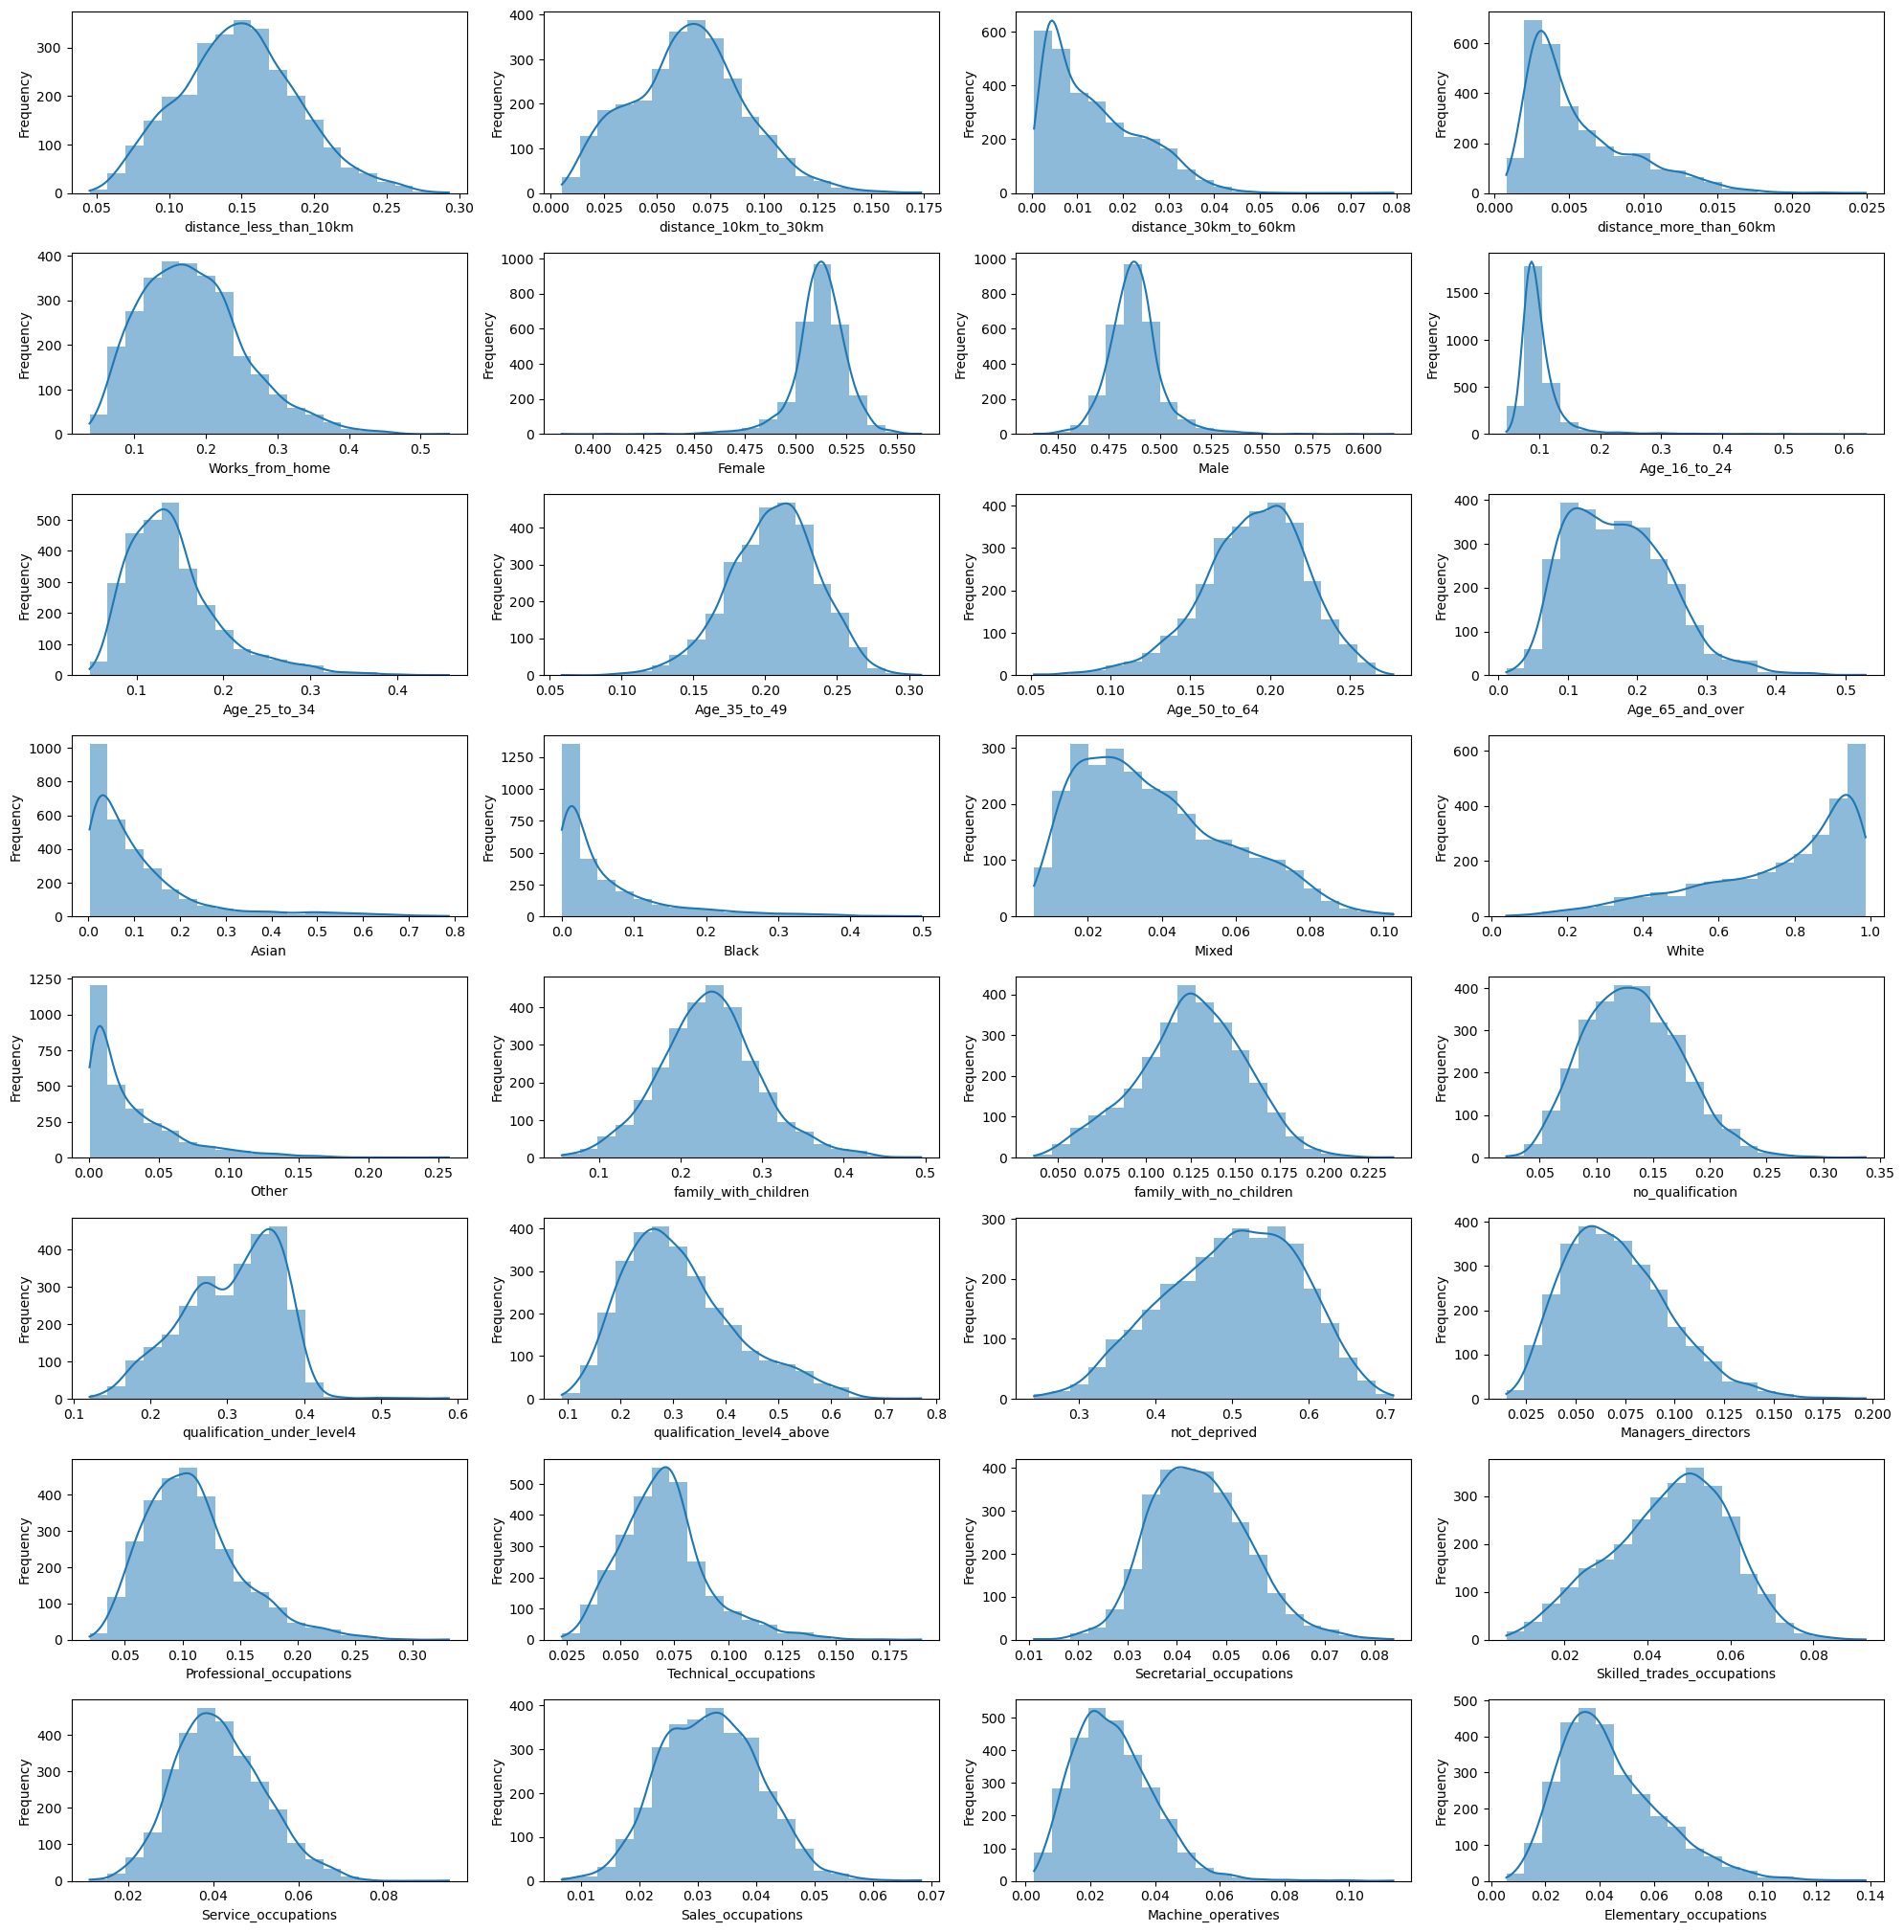

In [40]:
plt.figure(figsize=(20,40))

rows = len(data.columns) // 2 + len(data.columns) % 2
cols = 4

for i, column in enumerate(data.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data=data, x=column, bins=20, kde=True, linewidth= 0)  # 调整 linewidth 参数
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

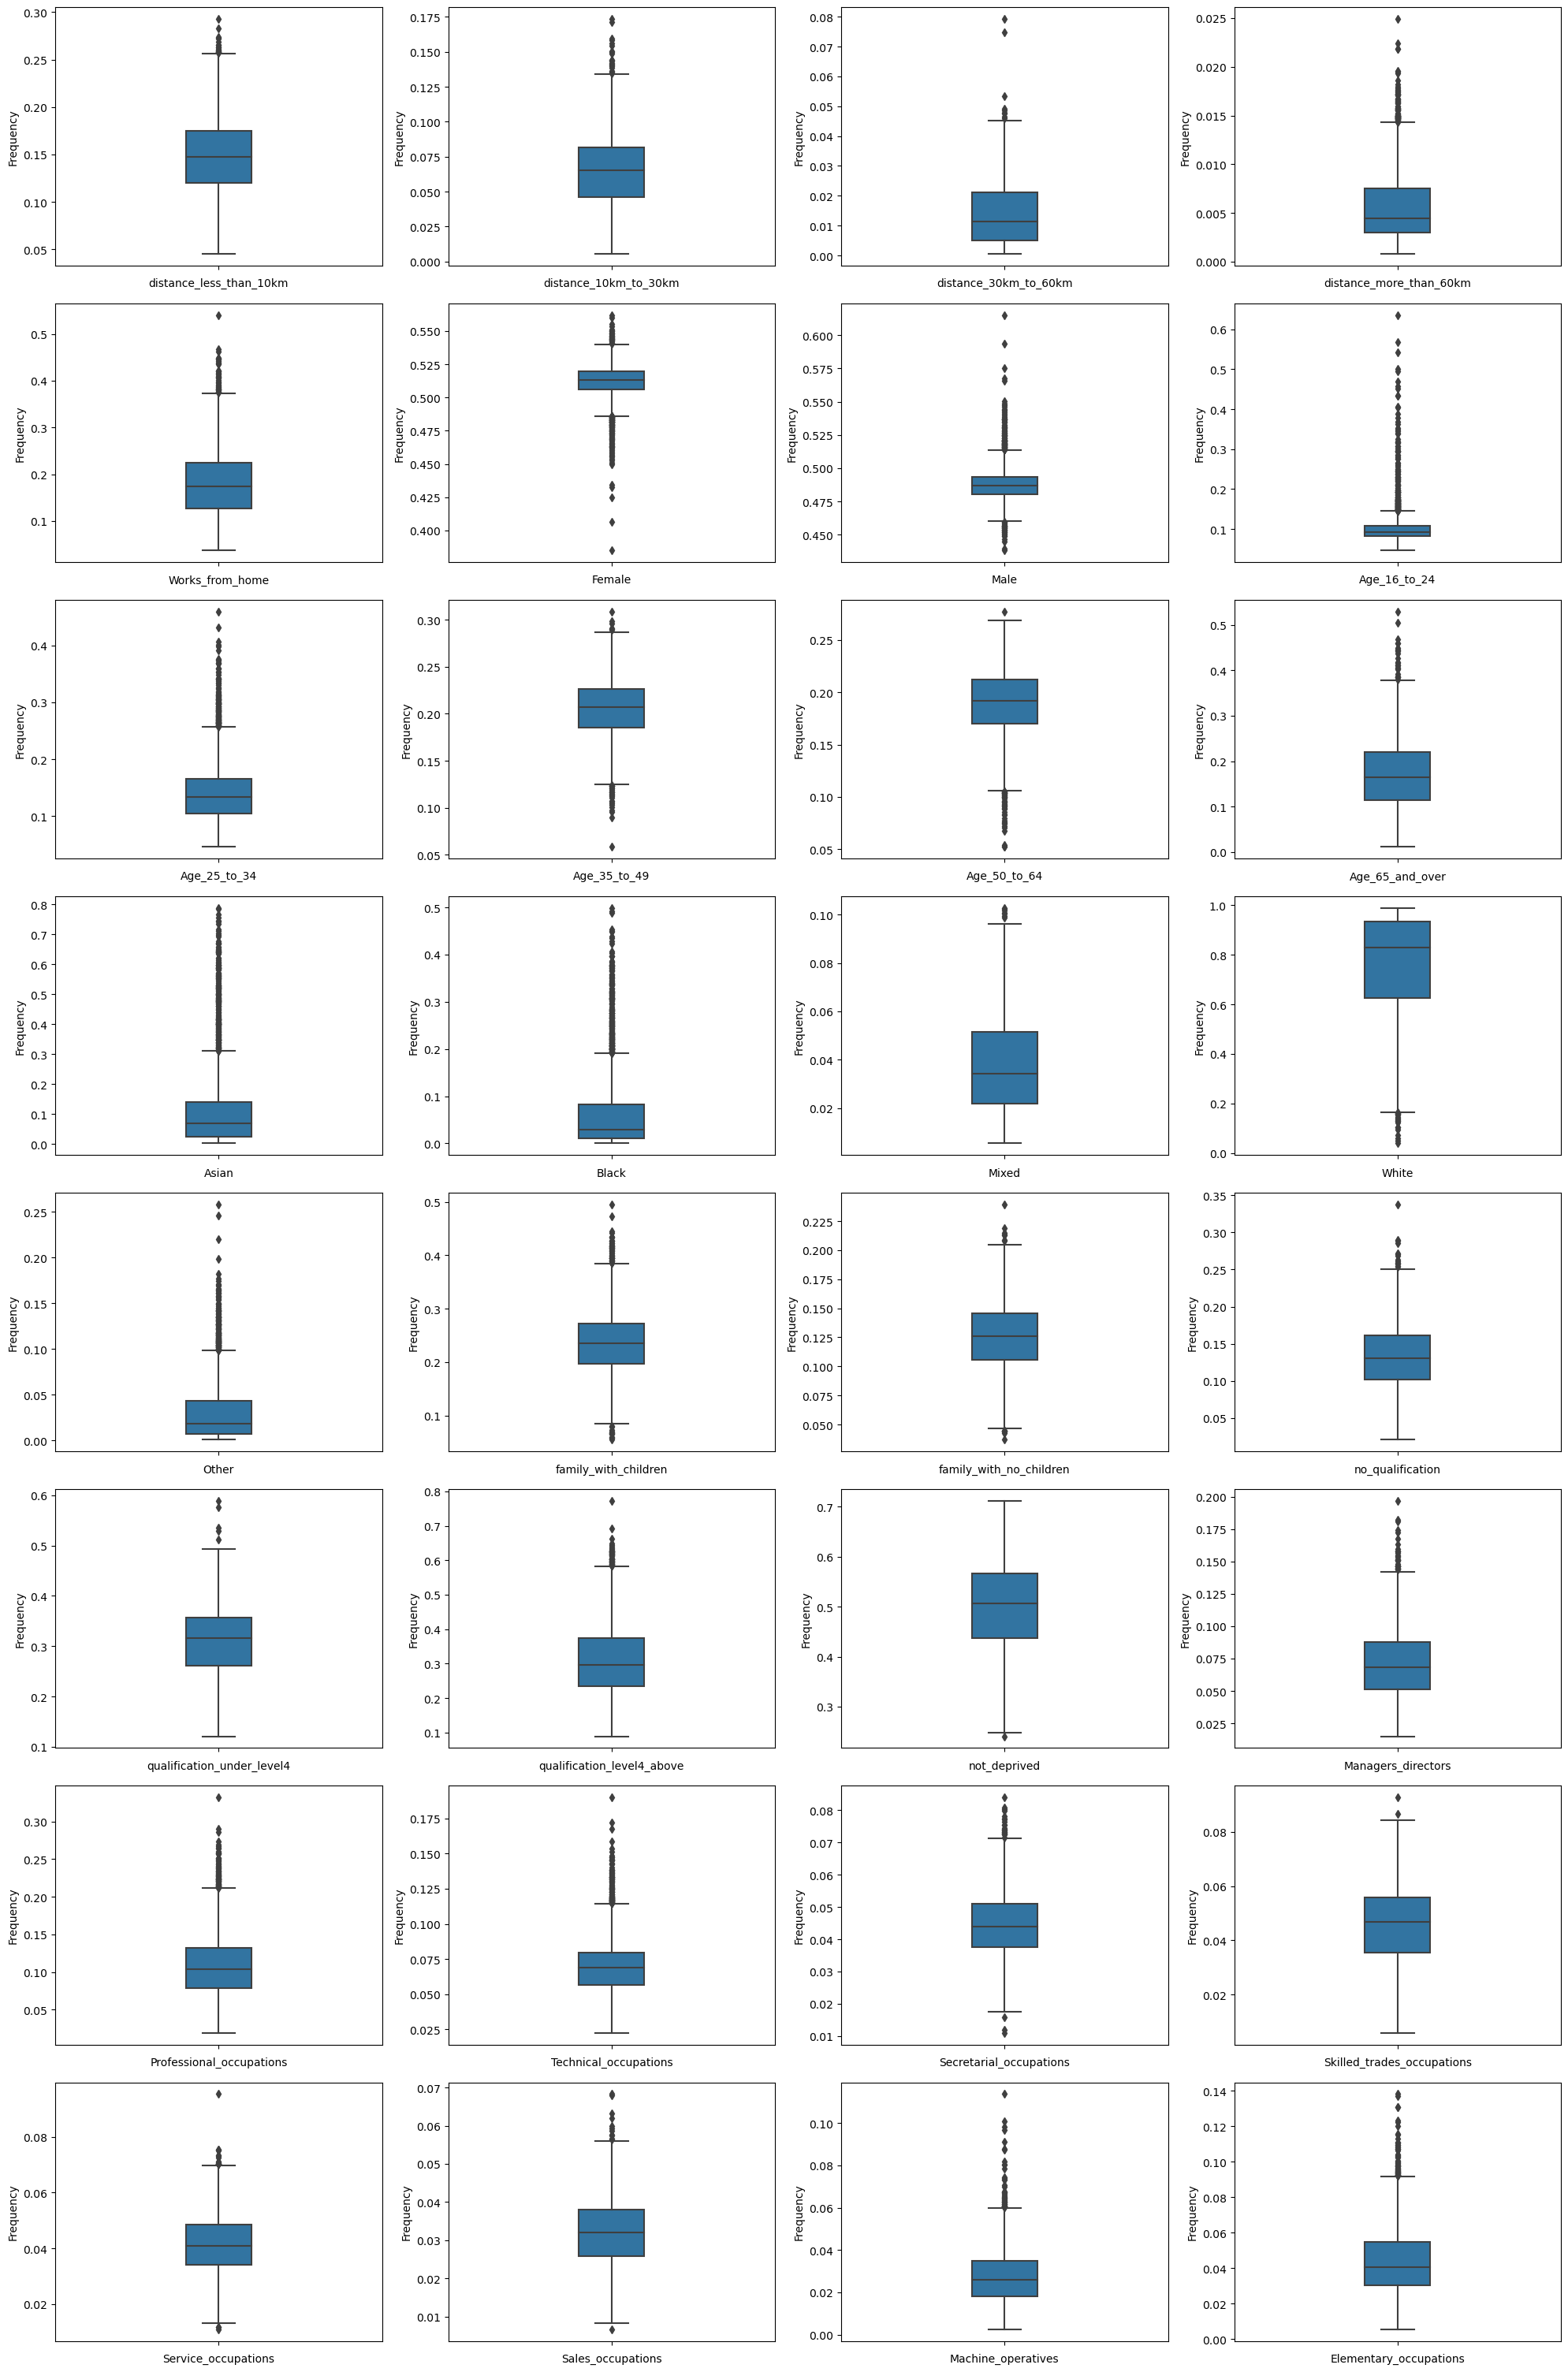

In [41]:
plt.figure(figsize=(20, 60))

rows = len(data.columns) // 2 + len(data.columns) % 2
cols = 4

for i, column in enumerate(data.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=data, y=column, width=0.2)  # 调整 linewidth 参数
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

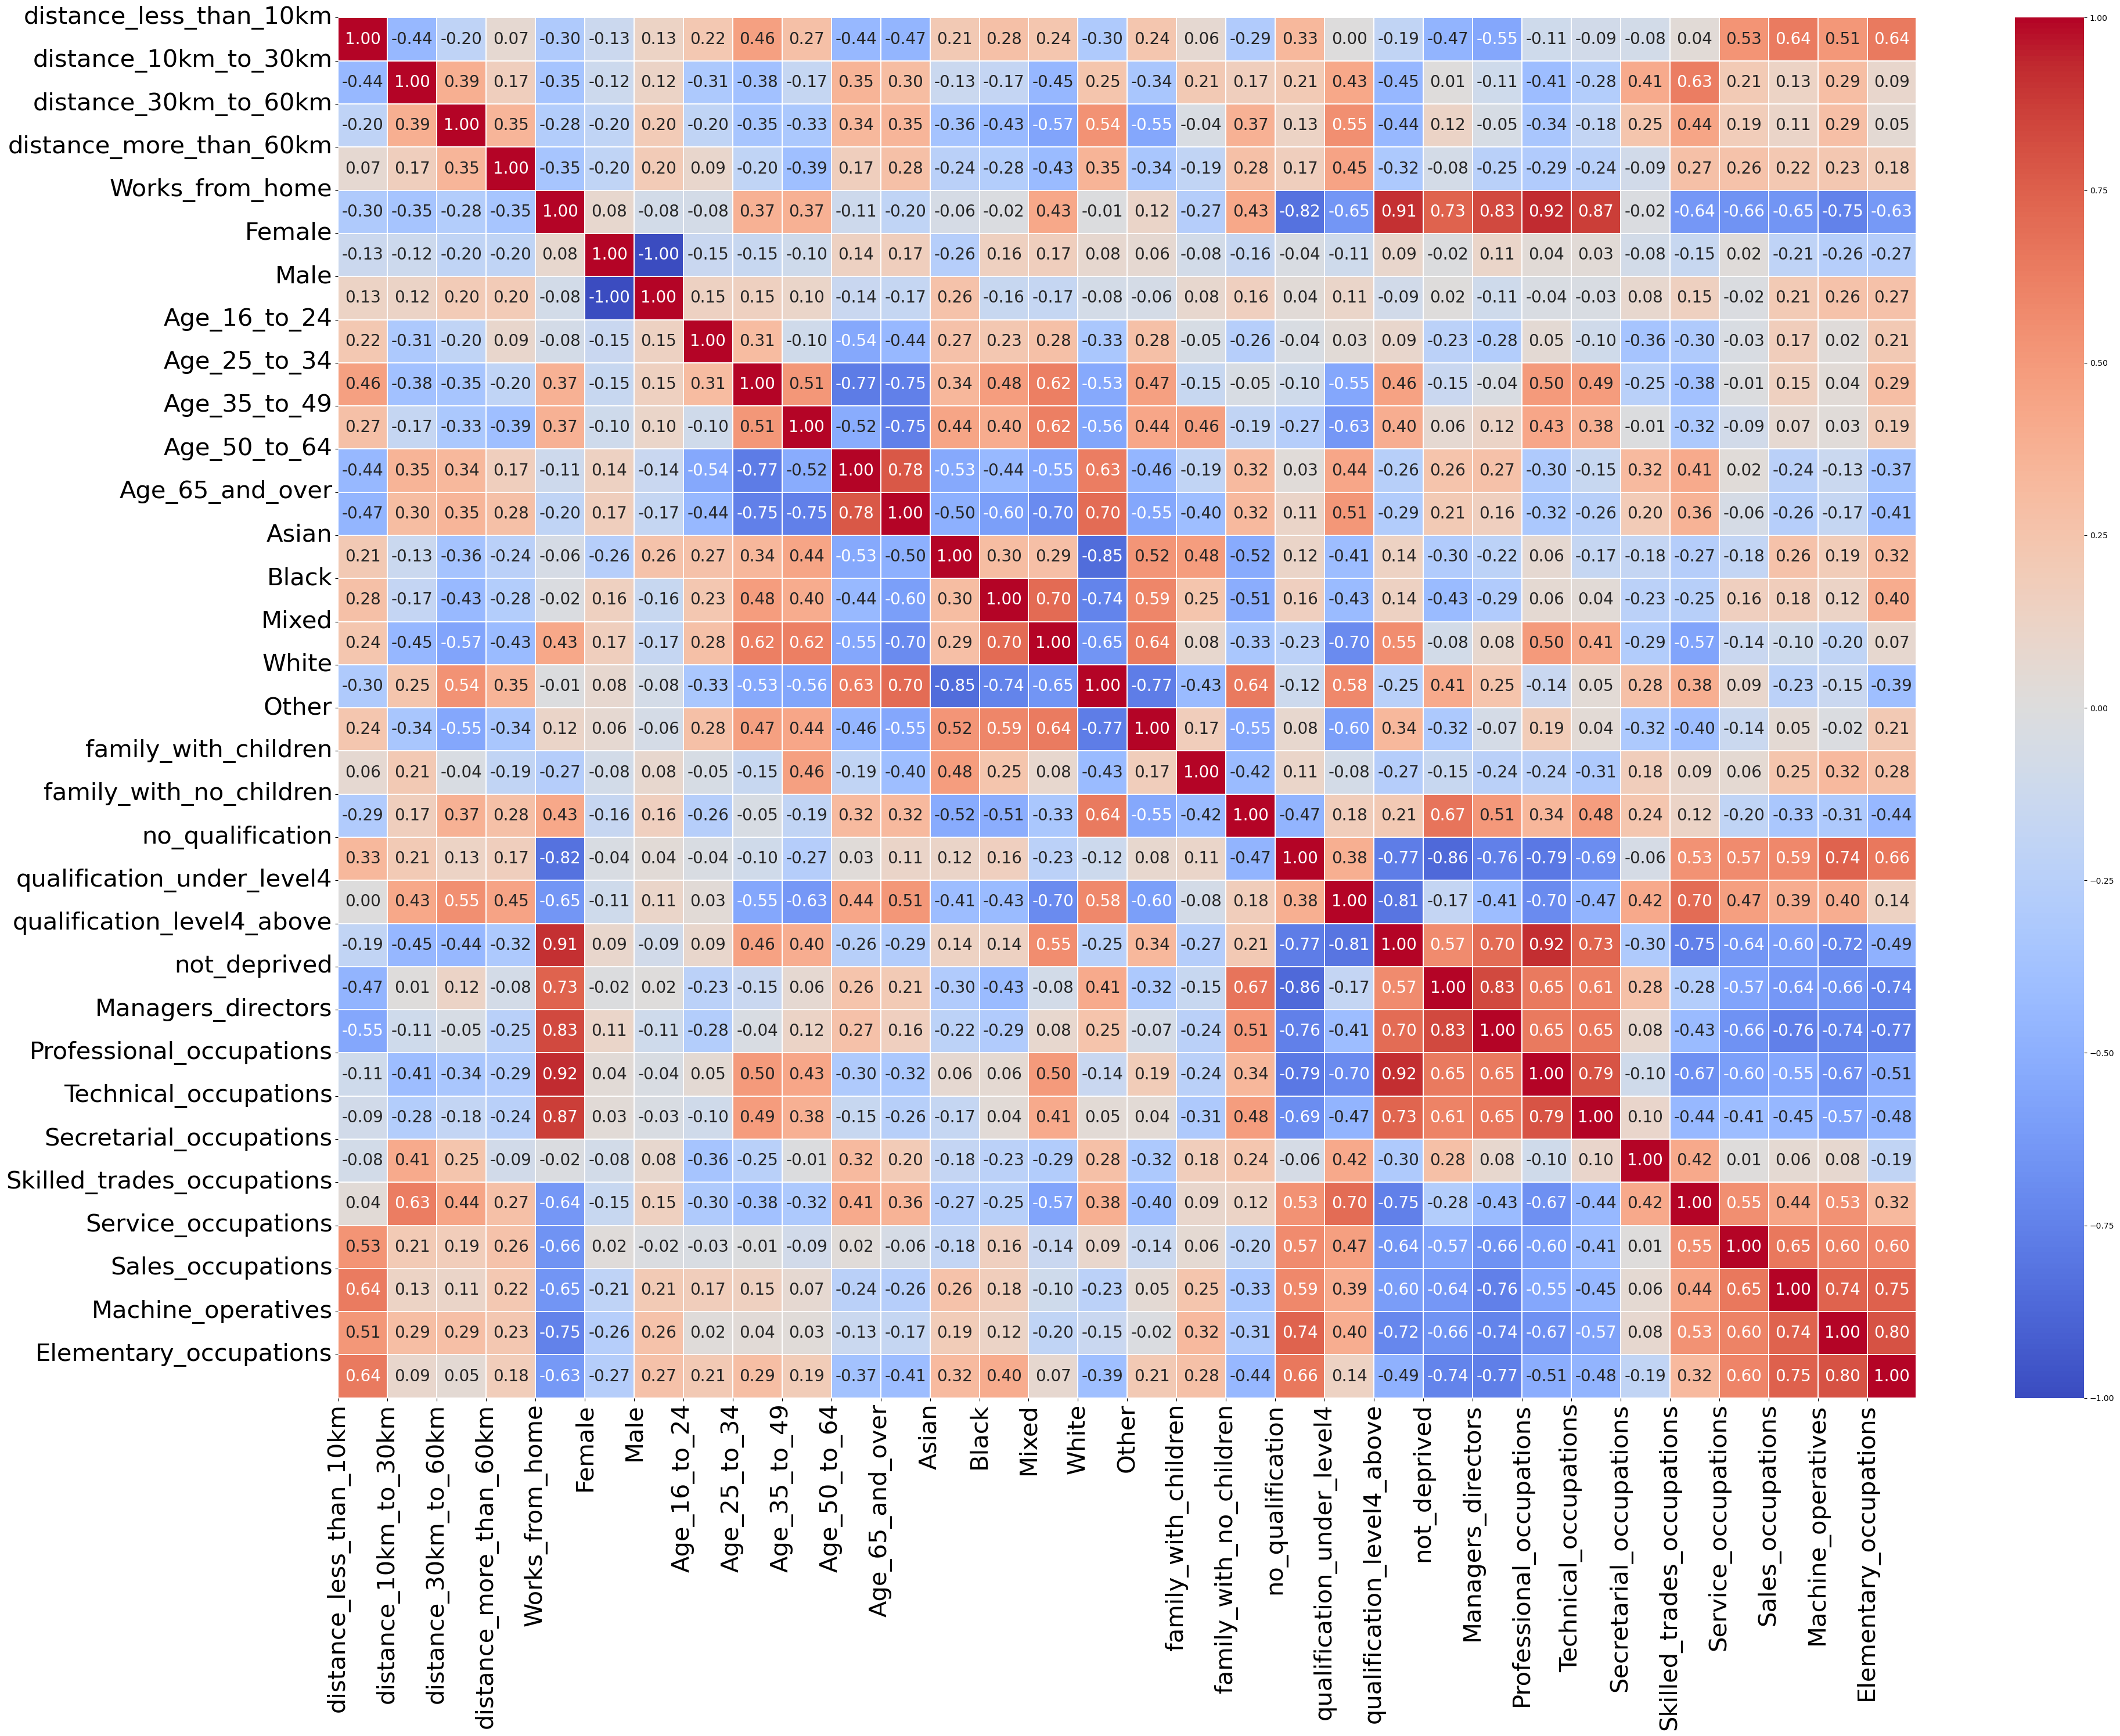

In [42]:
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(40, 30))

sns.heatmap(data.corr(),
            linewidths = 0.1,
            annot=True,
            fmt=".2f", 
            cmap='coolwarm',
            annot_kws={"fontsize":20}) 
plt.xticks(range(data.shape[1]), data.columns, fontsize=30, rotation = 90)
plt.yticks(range(data.shape[1]), data.columns, fontsize=30)
plt.tight_layout()

plt.show()

## 3. Feature Engineering

In [43]:
# Update features list
features = ['distance_less_than_10km', 'distance_10km_to_30km',
       'distance_30km_to_60km', 'distance_more_than_60km', 'Works_from_home',
       'Female', 'Male', 'Age_16_to_24', 'Age_25_to_34', 'Age_35_to_49',
       'Age_50_to_64', 'Age_65_and_over', 'Asian', 'Black', 'Mixed', 'White',
       'Other', 'family_with_children', 'family_with_no_children',
       'no_qualification', 'qualification_under_level4',
       'qualification_level4_above', 'not_deprived', 'Managers_directors',
       'Professional_occupations', 'Technical_occupations',
       'Secretarial_occupations', 'Skilled_trades_occupations',
       'Service_occupations', 'Sales_occupations', 'Machine_operatives',
       'Elementary_occupations']

In [44]:
df = data.copy()

In [45]:
# Import packages
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

### a. Log Transform

In [46]:
def log_transform(df, feature_skew_dict):
    for feature, skew in feature_skew_dict.items():
        assert df[feature].min() >= 0
        if skew == "right":
            df[feature] = np.log(df[feature] + 1)
        elif skew == "left":
            df[feature] = np.log((max(df[feature] + 1) - df[feature]))

In [47]:
feature_skew_dict = {
    "distance_30km_to_60km": "right",
    "distance_more_than_60km": "right",
    "Works_from_home": "right", 
    "Male": "right",
    "Age_16_to_24": "right",
    "Age_25_to_34": "right", 
    "Asian": "right",
    "Black": "right",
    "Mixed": "right",
    "Other": "right", 
    "no_qualification": "right",
    "qualification_level4_above": "right",
    "Managers_directors": "right", 
    "Professional_occupations": "right", 
    "Technical_occupations": "right",
    "Machine_operatives": "right",
    "Elementary_occupations": "right",   
    "Female": "left",
    "Age_35_to_49": "left",
    "Age_50_to_64": "left",
    "White": "left",
    "qualification_under_level4": "left",  
    "not_deprived": "left",
}

log_transform(df, feature_skew_dict)

### b. Outliers

In [48]:
def iqr_outliers(df, features):
    for feature in features:
        sorted_data = sorted(df[feature].dropna())
        q1, q3 = np.percentile(sorted_data, [25, 75])
        iqr = q3 - q1
        _lower = round(q1 - (1.5 * iqr), 4)
        _upper = round(q3 + (1.5 * iqr), 4)
        df[feature] = df[feature].apply(lambda x: np.where(x < _lower, np.nan, x))
        df[feature] = df[feature].apply(lambda x: np.where(x > _upper, np.nan, x))
        outliers_dict[feature] = {
            "min_max": {"1_min": round(df[feature].min(), 4),  "2_max": round(df[feature].max(), 4)},
            "iqr_bounds": {"1_lower": _lower, "2_upper": _upper}, 
        }

In [49]:
outliers_dict = dict()
iqr_outliers(df, features)


### c. StandardScaler

In [50]:
def standard_scale(df, features):
    z_scored = StandardScaler()
    df[features] = z_scored.fit_transform(df[features])

In [51]:
# Scale all features to a standard normal distribution
standard_scale(df, features)

### d. IterativeImputer

In [52]:
def impute_nans(df, features, method="iterative"):
    if method == "iterative":
            iterative_imputer = IterativeImputer(
                missing_values=np.nan,
                n_nearest_features=None,
                initial_strategy="mean",
                imputation_order="ascending",
                max_iter=10,                
                random_state=42,
                verbose=0,
            )
            df[features] = iterative_imputer.fit_transform(df[features])
    else:
        simple_imputer = SimpleImputer(
            missing_values=np.nan,
            strategy="mean",
            verbose=0,
        )
        df[features] = simple_imputer.fit_transform(df[features])

In [53]:
# Fill in NaNs with imputed values
impute_nans(df, features, method="iterative")

### e. Summary

In [54]:
print(df.shape)
df.head()

(2867, 32)


distance_less_than_10km  \
Middle layer Super Output Areas Code                            
E02000001                                            0.108940   
E02000002                                           -0.581522   
E02000003                                           -0.536284   
E02000004                                           -0.097098   
E02000005                                           -0.135117   

                                      distance_10km_to_30km  \
Middle layer Super Output Areas Code                          
E02000001                                         -2.045610   
E02000002                                          0.650839   
E02000003                                          1.449567   
E02000004                                          1.245045   
E02000005                                          1.150610   

                                      distance_30km_to_60km  \
Middle layer Super Output Areas Code                          
E02000001                                         -1.198490   
E02000002                                         -0.348848   
E02000003                                         -0.702678   
E02000004                                         -0.715863   
E02000005                                         -0.710809   

                                      distance_more_than_60km  \
Middle layer Super Output Areas Code                            
E02000001                                           -0.684668   
E02000002                                           -0.724525   
E02000003                                           -0.507889   
E02000004                                           -0.280411   
E02000005                                           -0.079421   

                                      Works_from_home    Female      Male  \
Middle layer Super Output Areas Code                                        
E02000001                                    3.024805 -0.020893 -0.016831   
E02000002                                   -1.443181 -1.355864 -1.355849   
E02000003                                   -0.916788  0.785902  0.789207   
E02000004                                   -0.887938  0.218112  0.219290   
E02000005                                   -1.210291  0.078018  0.078810   

                                      Age_16_to_24  Age_25_to_34  \
Middle layer Super Output Areas Code                               
E02000001                                 2.324543      2.755613   
E02000002                                 0.895845      0.187504   
E02000003                                 1.185201      0.585699   
E02000004                                 0.930389      0.383874   
E02000005                                 0.815877      0.118583   

                                      Age_35_to_49  ...  not_deprived  \
Middle layer Super Output Areas Code                ...                 
E02000001                                -0.172210  ...     -1.135487   
E02000002                                -0.286685  ...      1.836817   
E02000003                                -0.303976  ...      0.928200   
E02000004                                 0.217015  ...      0.715960   
E02000005                                -1.246946  ...      0.866122   

                                      Managers_directors  \
Middle layer Super Output Areas Code                       
E02000001                                       2.268821   
E02000002                                      -1.482504   
E02000003                                      -1.035396   
E02000004                                      -1.235559   
E02000005                                      -1.255322   

                                      Professional_occupations  \
Middle layer Super Output Areas Code                             
E02000001                                             3.542317   
E02000002                                            -1.118236   
E02000003                   

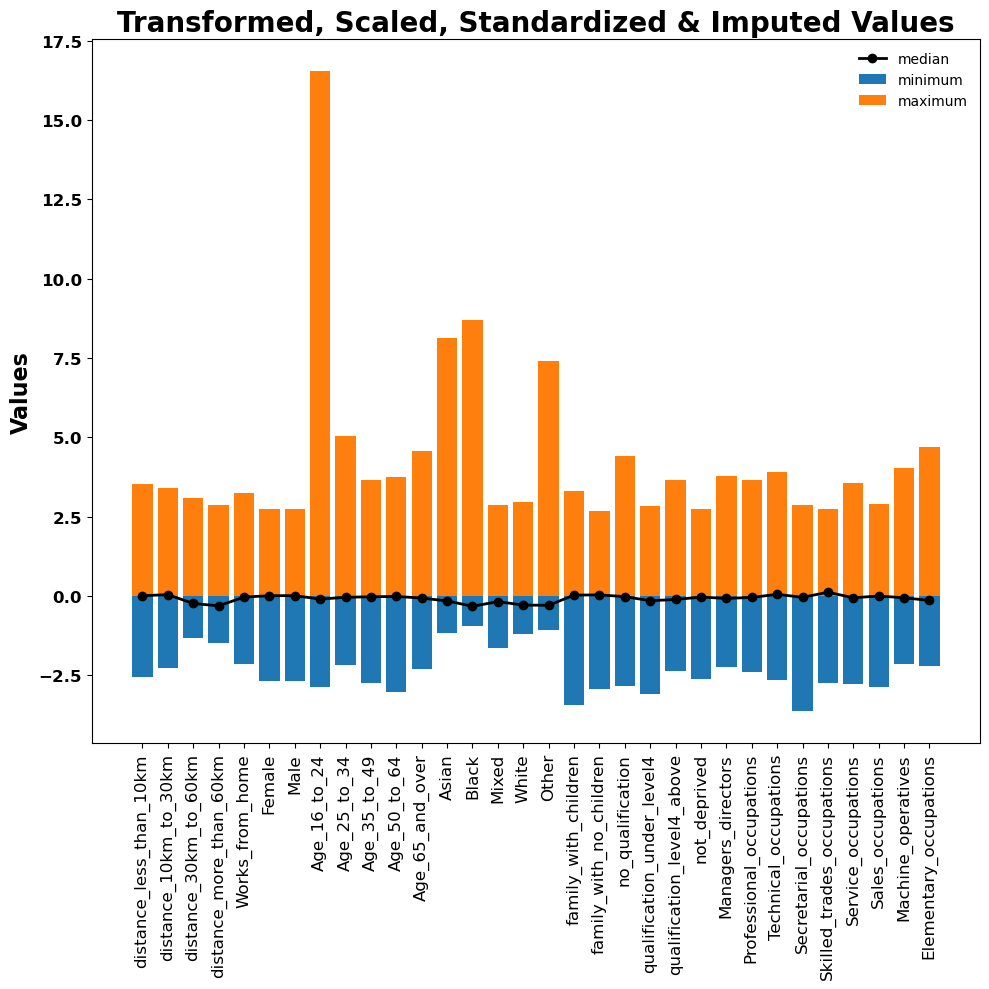

In [55]:
# Graph min, median & max values of each feature after they've been feature engineered
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(df.describe().columns.tolist(), df.describe().iloc[5,:], label="median", color="black", linewidth=2, marker="o")
plt.bar(df.describe().columns.tolist(), df.describe().iloc[3,:], label="minimum")
plt.bar(df.describe().columns.tolist(), df.describe().iloc[-1,:], label="maximum")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, fontweight="bold")
plt.ylabel("Values", fontsize=16, fontweight="bold")
plt.title("Transformed, Scaled, Standardized & Imputed Values", fontsize=20, fontweight="bold")
ax.title.set_position([.5, 1.025])
plt.legend(loc="best", frameon=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/pca_values_employee.png"
plt.savefig(save_path)
plt.show()

## 4. Dimensionality Reduction

In [56]:
# Import packages
from sklearn.decomposition import PCA

In [57]:
# Convert dataframe into numpy array (allows for faster computation)
X = df[features].values

In [58]:
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

In [59]:
df_pca = pd.DataFrame({
    "principal_component": range(1, X.shape[1]+1),
    "explained_variance": pca.explained_variance_ratio_,
    "cumsum_explained_variance": pca.explained_variance_ratio_.cumsum(),
})
df_pca.loc[-1] = 0
df_pca.sort_values(by="principal_component", inplace=True)

In [60]:
print(df_pca.shape)
df_pca.head()

(33, 3)


principal_component  explained_variance  cumsum_explained_variance
-1                    0            0.000000                   0.000000
 0                    1            0.305909                   0.305909
 1                    2            0.264056                   0.569965
 2                    3            0.082371                   0.652337
 3                    4            0.075849                   0.728186

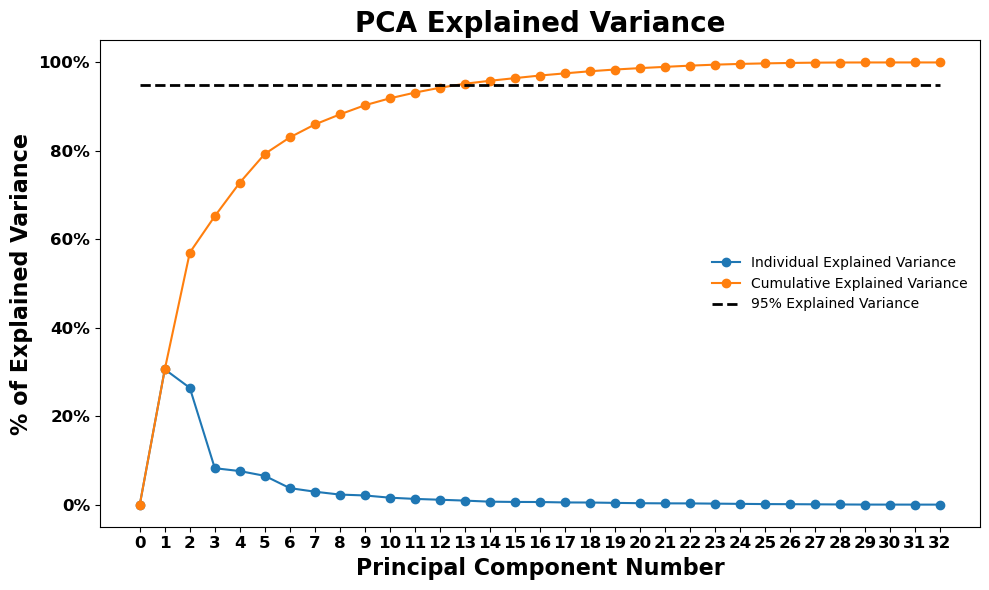

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df_pca["principal_component"], df_pca["explained_variance"], marker="o", label="Individual Explained Variance")
plt.plot(df_pca["principal_component"], df_pca["cumsum_explained_variance"], marker="o", label="Cumulative Explained Variance")
plt.plot(df_pca["principal_component"], [0.95] * len(df_pca), color="black", linewidth=2, linestyle="--", label="95% Explained Variance")
ax.set_xticklabels(["{:,.0f}".format(x) for x in ax.get_xticks()])
ax.set_yticklabels(["{:,.0%}".format(x) for x in ax.get_yticks()])
plt.title("PCA Explained Variance", fontsize=20, fontweight="bold")
ax.title.set_position([.5, 1.025])
plt.xticks(range(0,33), range(0,33), fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.xlabel("Principal Component Number", fontsize=16, fontweight="bold")
plt.ylabel("% of Explained Variance", fontsize=16, fontweight="bold")
plt.grid(False)
plt.legend(loc="best", frameon=False)
plt.tight_layout()

save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/PCA_employee.png"
plt.savefig(save_path)

plt.show()

In [62]:
n_components_pca = int(df_pca["cumsum_explained_variance"].gt(0.95).idxmax())
print("# of Features Until 95% Variance is Reached:", n_components_pca)

# of Features Until 95% Variance is Reached: 12


In [63]:
pca = PCA(n_components=n_components_pca, random_state=42)
X = pca.fit_transform(X)

In [64]:
print(X.shape)
X

(2867, 12)


array([[ 4.32742663,  8.43148189,  3.23059226, ..., -0.38730349,
        -0.21953925, -0.03414342],
       [ 3.33481303, -4.10981199, -1.65166235, ..., -0.58293741,
        -0.37292415, -1.09484035],
       [ 3.40758069, -3.71606273, -2.41726627, ...,  0.25703064,
         0.05585716, -0.73713216],
       ...,
       [ 6.67821286,  2.89421468,  1.35900637, ..., -0.63099364,
        -0.59555174, -1.18708416],
       [ 7.04962922, -0.5531048 ,  7.85372571, ..., -0.7399691 ,
        -0.25884136, -0.40689764],
       [ 4.68410155, -0.5063154 ,  3.13936661, ...,  0.10027717,
        -0.35570251,  0.00993584]])

## 5. KMeans Clustering

In [65]:
# Import packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [66]:
# Define range of clusters to check
inertia_scores = []
silhouette_scores = []
no_of_clusters = range(2, 22)

In [67]:
# Calculate intertia & silhouette average for each cluster
for cluster in tqdm(no_of_clusters):
    kmeans = KMeans(n_clusters=cluster, init="k-means++", random_state=42)
    kmeans = kmeans.fit(X)
    
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    
    inertia_scores.append(round(inertia))
    silhouette_scores.append(silhouette_avg)

  0%|          | 0/20 [00:00<?, ?it/s]

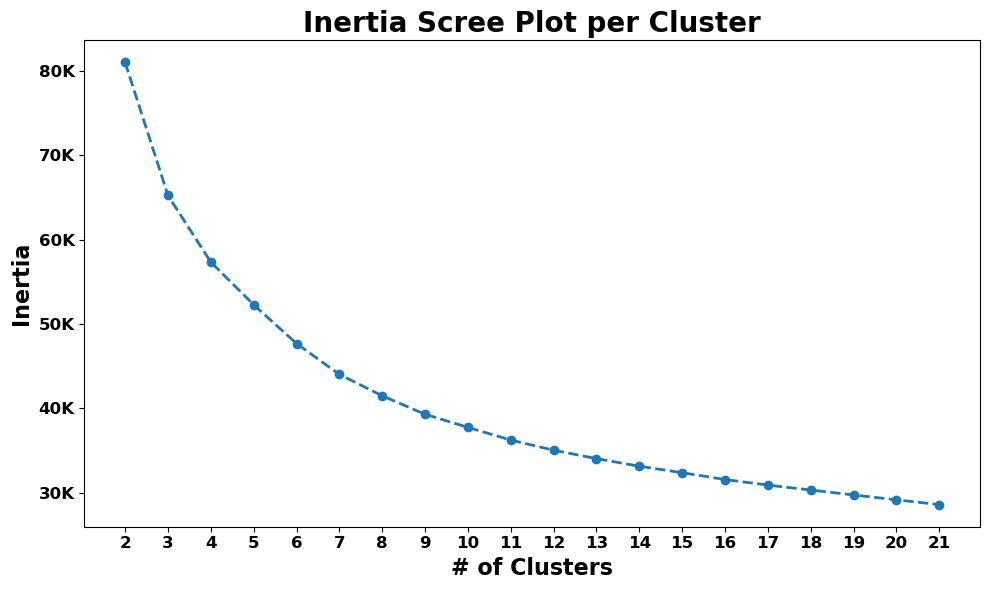

In [68]:
# Interia scree plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(range(1, len(no_of_clusters)+1), inertia_scores, marker="o", linewidth=2, linestyle="--")
plt.xticks(range(1, len(no_of_clusters)+1), no_of_clusters, fontsize=12, fontweight="bold")
ax.set_yticklabels(["{:,.0f}".format(x/1000) + "K" for x in ax.get_yticks()])
plt.yticks(fontsize=12, fontweight="bold")
plt.xlabel("# of Clusters", fontsize=16, fontweight="bold")
plt.ylabel("Inertia", fontsize=16, fontweight="bold")
plt.title("Inertia Scree Plot per Cluster", fontsize=20, fontweight="bold")
ax.title.set_position([.5, 1.025])
plt.grid(False)
plt.tight_layout()

save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/Inertia_employee.png"
plt.savefig(save_path)

plt.show()

In [69]:
slopes = [0]
slopes_pct_change = []
inertia_df = pd.DataFrame()
inertia_df["inertia"] = inertia_scores
inertia_df["n_clusters"] = inertia_df.index + 2

In [70]:
def derivative_calc(df, x_field, y_field):
    x_values = df[x_field].values
    y_values = df[y_field].values
    for i in range(1, len(x_values)):
        (x1, y1) = (x_values[i-1], y_values[i-1])
        (x2, y2) = (x_values[i], y_values[i])
        slope = round((y2 - y1) / (x2 - x1), 4)
        slopes.append(slope)
        slopes_pct_change.append((abs(slopes[i-1]) - abs(slopes[i])) / abs(slopes[i-1]))
    df["slopes"] = slopes
    df["slopes_pct_change"] = slopes_pct_change + [0]

In [71]:
derivative_calc(inertia_df, "n_clusters", "inertia")
n_clusters_kmeans = int(inertia_df.loc[inertia_df["slopes_pct_change"].idxmax()]["n_clusters"])
print("# of Clusters for KMeans Algorithm:", n_clusters_kmeans)

# of Clusters for KMeans Algorithm: 3


In [72]:
kmeans = KMeans(n_clusters=n_clusters_kmeans, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [73]:
silhouette_kmeans_euclidean = round(silhouette_score(X, y_kmeans, metric="euclidean"), 3)
silhouette_kmeans_manhattan = round(silhouette_score(X, y_kmeans, metric="manhattan"), 3)
print("Silhouette Score KMeans Euclidean:", silhouette_kmeans_euclidean, "\nSilhouette Score KMeans Manhattan:", silhouette_kmeans_manhattan)

Silhouette Score KMeans Euclidean: 0.269 
Silhouette Score KMeans Manhattan: 0.216


# 

## 6. Cluster Profiles

In [74]:
df_preprocessed = data.copy()

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2867 entries, E02000001 to E02007116
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   distance_less_than_10km     2867 non-null   float64
 1   distance_10km_to_30km       2867 non-null   float64
 2   distance_30km_to_60km       2867 non-null   float64
 3   distance_more_than_60km     2867 non-null   float64
 4   Works_from_home             2867 non-null   float64
 5   Female                      2867 non-null   float64
 6   Male                        2867 non-null   float64
 7   Age_16_to_24                2867 non-null   float64
 8   Age_25_to_34                2867 non-null   float64
 9   Age_35_to_49                2867 non-null   float64
 10  Age_50_to_64                2867 non-null   float64
 11  Age_65_and_over             2867 non-null   float64
 12  Asian                       2867 non-null   float64
 13  Black                    

In [76]:
df_preprocessed["kmeans_pred"] = y_kmeans


In [77]:
df_all_kmeans_avgs = df_preprocessed.groupby("kmeans_pred").mean().reset_index()[["kmeans_pred"] + features]

In [78]:
df_all_kmeans_avgs

kmeans_pred  distance_less_than_10km  distance_10km_to_30km  \
0            0                 0.143198               0.042689   
1            1                 0.138072               0.075161   
2            2                 0.175372               0.063021   

   distance_30km_to_60km  distance_more_than_60km  Works_from_home    Female  \
0               0.006392                 0.003670         0.277934  0.515229   
1               0.019000                 0.006735         0.164886  0.512356   
2               0.010085                 0.005343         0.125126  0.509231   

       Male  Age_16_to_24  Age_25_to_34  ...  not_deprived  \
0  0.484771      0.108017      0.186971  ...      0.559115   
1  0.487644      0.087188      0.114094  ...      0.516300   
2  0.490769      0.128193      0.164380  ...      0.406150   

   Managers_directors  Professional_occupations  Technical_occupations  \
0            0.095415                  0.166820               0.092348   
1            0.072282                  0.094774               0.067652   
2            0.045331                  0.084847               0.054343   

   Secretarial_occupations  Skilled_trades_occupations  Service_occupations  \
0                 0.039566                    0.027915             0.032378   
1                 0.048825                    0.052884             0.043421   
2                 0.040289                    0.045316             0.046478   

   Sales_occupations  Machine_operatives  Elementary_occupations  
0           0.025242            0.015509                0.031233  
1           0.032125            0.027633                0.039762  
2           0.039324            0.038015                0.066164  

[3 rows x 33 columns]

In [79]:
def plot_bar(df, group_col):
    fig, ax = plt.subplots(figsize=(20, 30))
    for idx, f in enumerate(df.columns[1:]):
        ax1 = plt.subplot(7, 5, idx+1)
        plt.bar(df[group_col], df[f], alpha=0.8)
        plt.ylim(df[f].min() * 0.8, df[f].max() * 1.2)
        plt.title(f, fontsize=15, fontweight="bold")
        plt.xticks(df["kmeans_pred"])
        plt.grid(False)
    
        labels = round(df[f], 2).values.tolist()
        for rect, label in zip(ax1.patches, labels):
            height = rect.get_height()
            ax1.text(rect.get_x() + rect.get_width() / 2, height + 0.001, label, ha="center", va="bottom")
    
    plt.tight_layout()

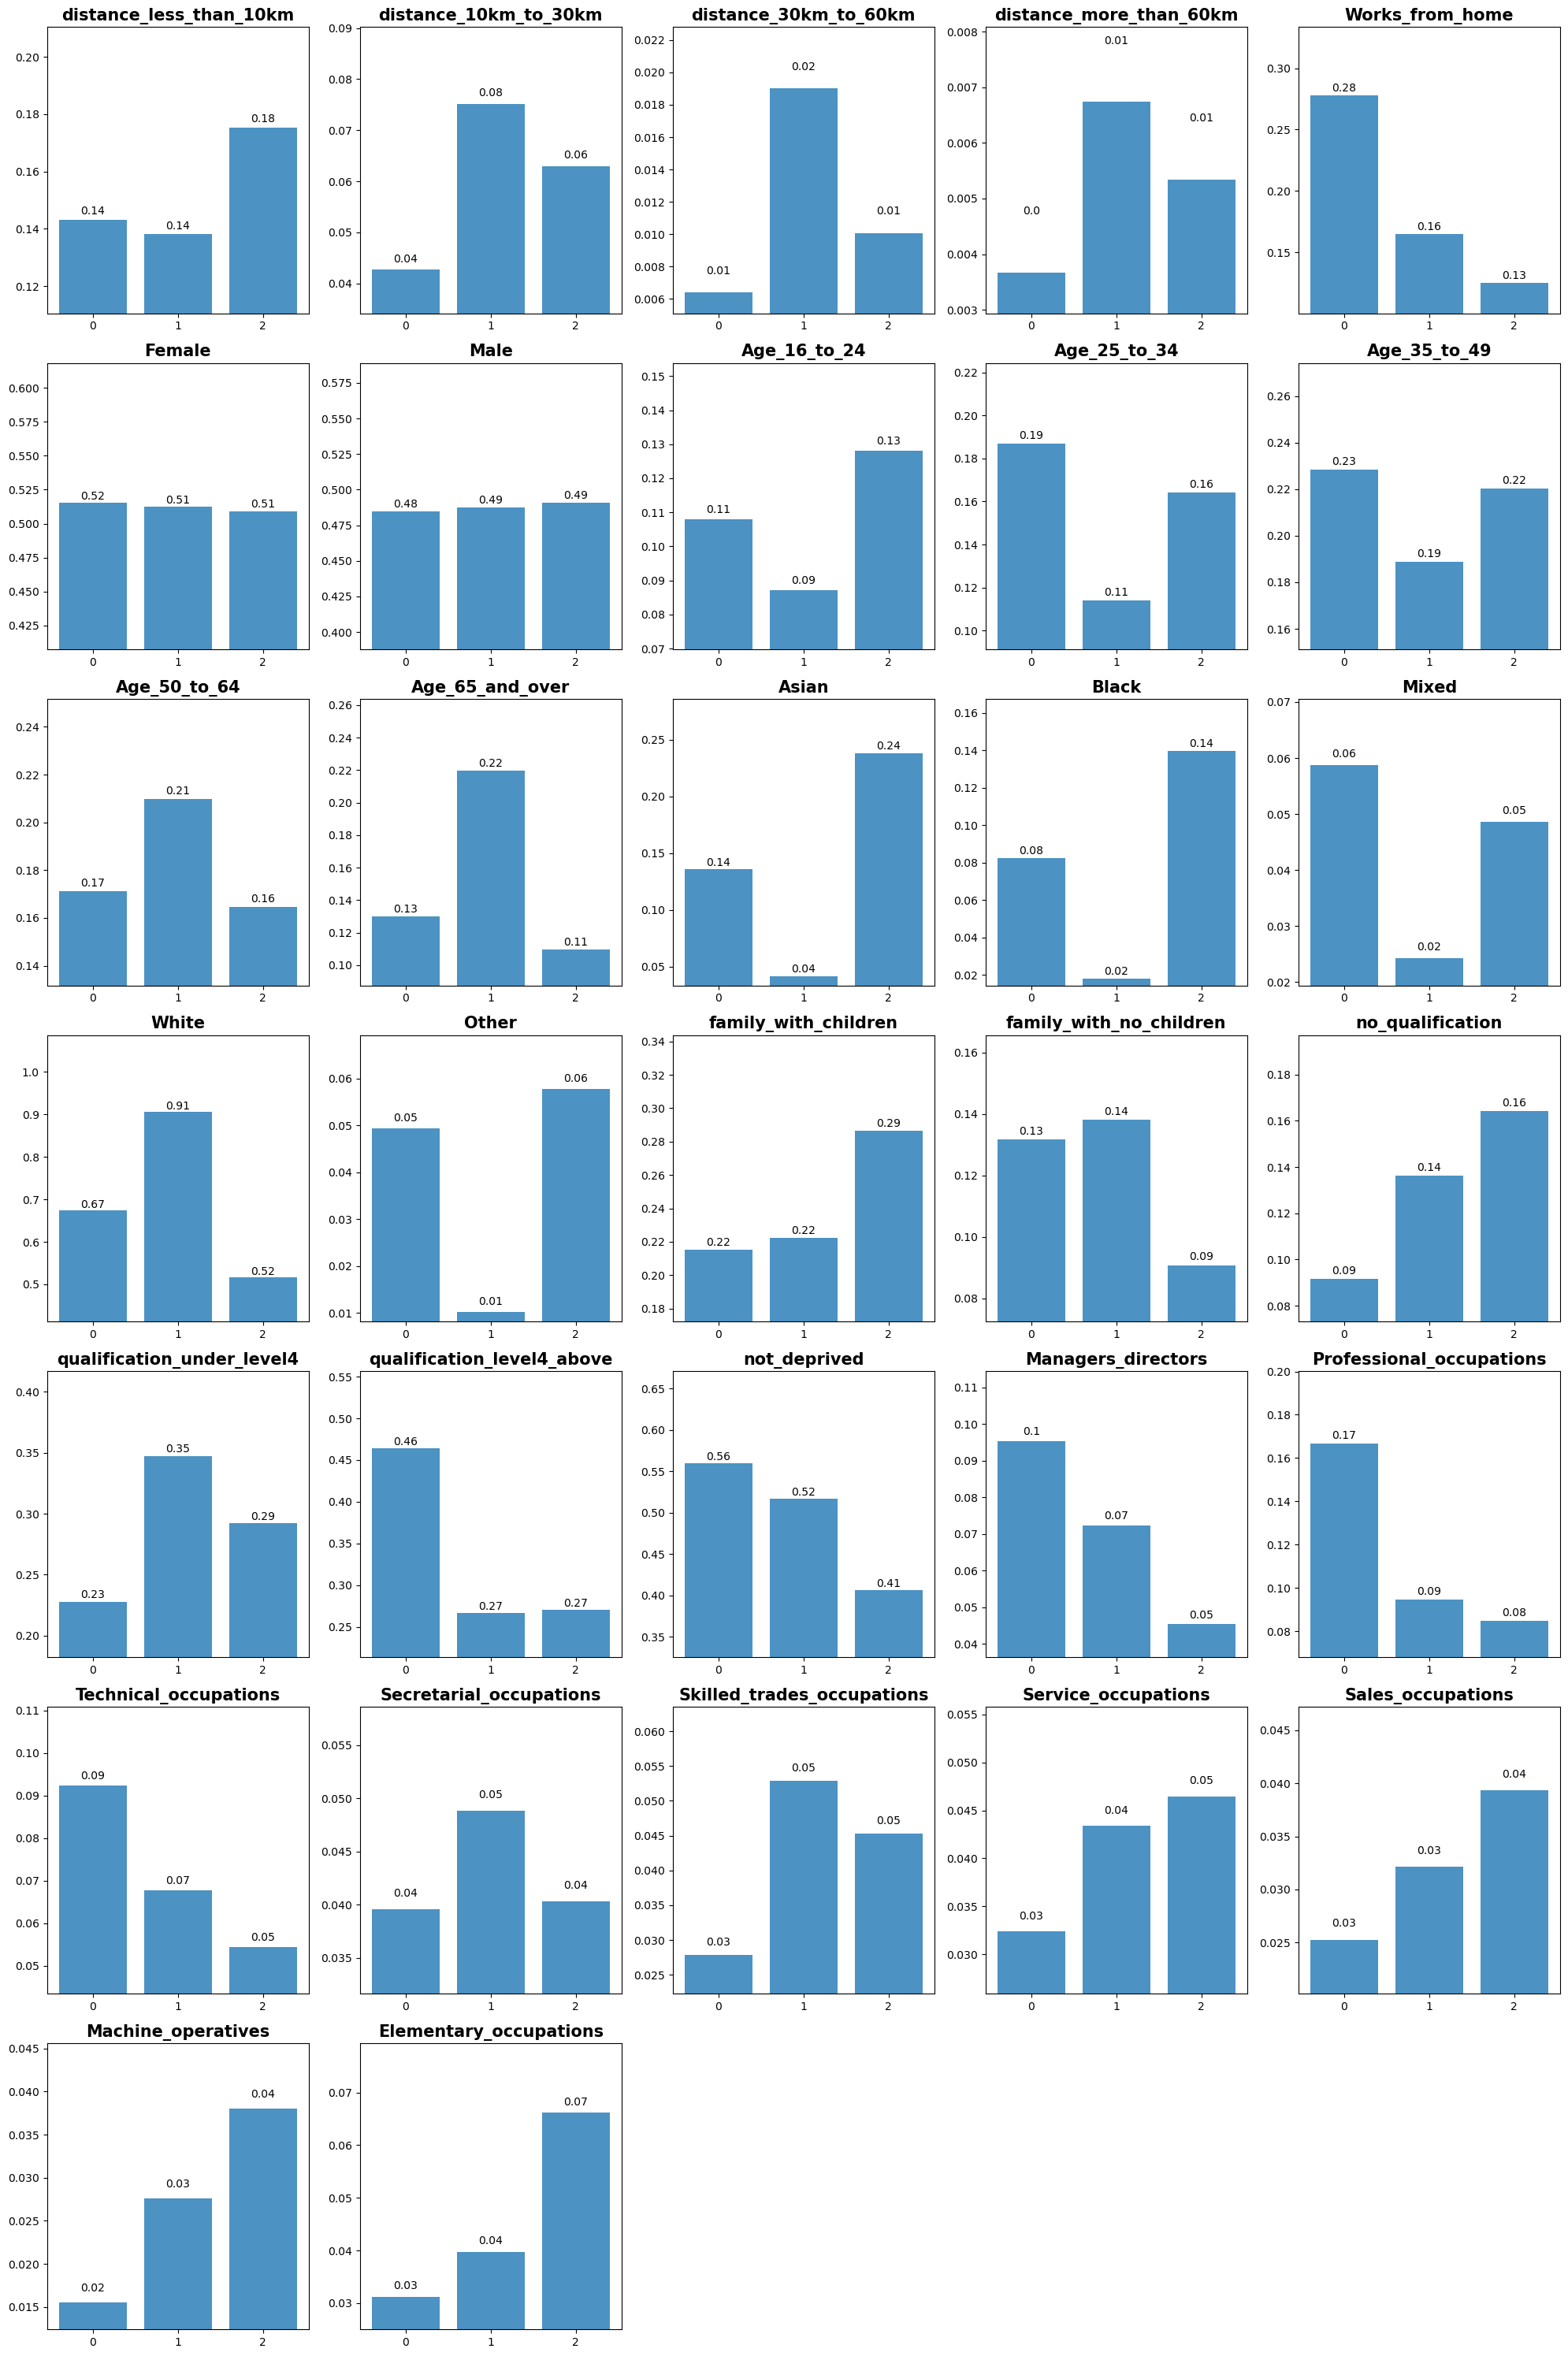

In [80]:
save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/Cluster_profile_employee.png"

plot_bar(df_all_kmeans_avgs, "kmeans_pred")
plt.savefig(save_path)
plt.show()

In [81]:
# Replace mean value with rank relative to all the clusters (1 = lowest, 4 = higheest)
for col in df_all_kmeans_avgs.columns:
    df_all_kmeans_avgs[col] = df_all_kmeans_avgs[col].rank()

In [82]:
# Show as Pandas dataframe
cluster_profiles_df = df_all_kmeans_avgs.T
cluster_profiles_df = cluster_profiles_df.astype(int).reset_index()
cluster_profiles_df.columns = ["Features", "Cluster 0", "Cluster 1", "Cluster 2"]
print(cluster_profiles_df.iloc[:, 1:].sum())
cluster_profiles_df.iloc[1:, :]

Cluster 0    62
Cluster 1    67
Cluster 2    69
dtype: int64


Features  Cluster 0  Cluster 1  Cluster 2
1      distance_less_than_10km          2          1          3
2        distance_10km_to_30km          1          3          2
3        distance_30km_to_60km          1          3          2
4      distance_more_than_60km          1          3          2
5              Works_from_home          3          2          1
6                       Female          3          2          1
7                         Male          1          2          3
8                 Age_16_to_24          2          1          3
9                 Age_25_to_34          3          1          2
10                Age_35_to_49          3          1          2
11                Age_50_to_64          2          3          1
12             Age_65_and_over          2          3          1
13                       Asian          2          1          3
14                       Black          2          1          3
15                       Mixed          3          1          2
16                       White          2          3          1
17                       Other          2          1          3
18        family_with_children          1          2          3
19     family_with_no_children          2          3          1
20            no_qualification          1          2          3
21  qualification_under_level4          1          3          2
22  qualification_level4_above          3          1          2
23                not_deprived          3          2          1
24          Managers_directors          3          2          1
25    Professional_occupations          3          2          1
26       Technical_occupations          3          2          1
27     Secretarial_occupations          1          3          2
28  Skilled_trades_occupations          1          3          2
29         Service_occupations          1          2          3
30           Sales_occupations          1          2          3
31          Machine_operatives          1          2          3
32      Elementary_occupations          1          2          3

## 7. Visualisation

In [83]:
import geopandas as gpd

shp = gpd.read_file("/Users/yobin/Downloads/MSOA_2021/MSOA_2021_EW_BSC.shp")
shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7264 entries, 0 to 7263
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MSOA21CD  7264 non-null   object  
 1   MSOA21NM  7264 non-null   object  
 2   GlobalID  7264 non-null   object  
 3   geometry  7264 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 227.1+ KB


In [84]:
mapping = pd.merge(shp, df_preprocessed, left_on='MSOA21CD', right_on='Middle layer Super Output Areas Code', how='inner').reset_index()
mapping.shape

(2867, 38)

In [85]:
mapping.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   index                       2867 non-null   int64   
 1   MSOA21CD                    2867 non-null   object  
 2   MSOA21NM                    2867 non-null   object  
 3   GlobalID                    2867 non-null   object  
 4   geometry                    2867 non-null   geometry
 5   distance_less_than_10km     2867 non-null   float64 
 6   distance_10km_to_30km       2867 non-null   float64 
 7   distance_30km_to_60km       2867 non-null   float64 
 8   distance_more_than_60km     2867 non-null   float64 
 9   Works_from_home             2867 non-null   float64 
 10  Female                      2867 non-null   float64 
 11  Male                        2867 non-null   float64 
 12  Age_16_to_24                2867 non-null   float64 
 13  Age_25_to_

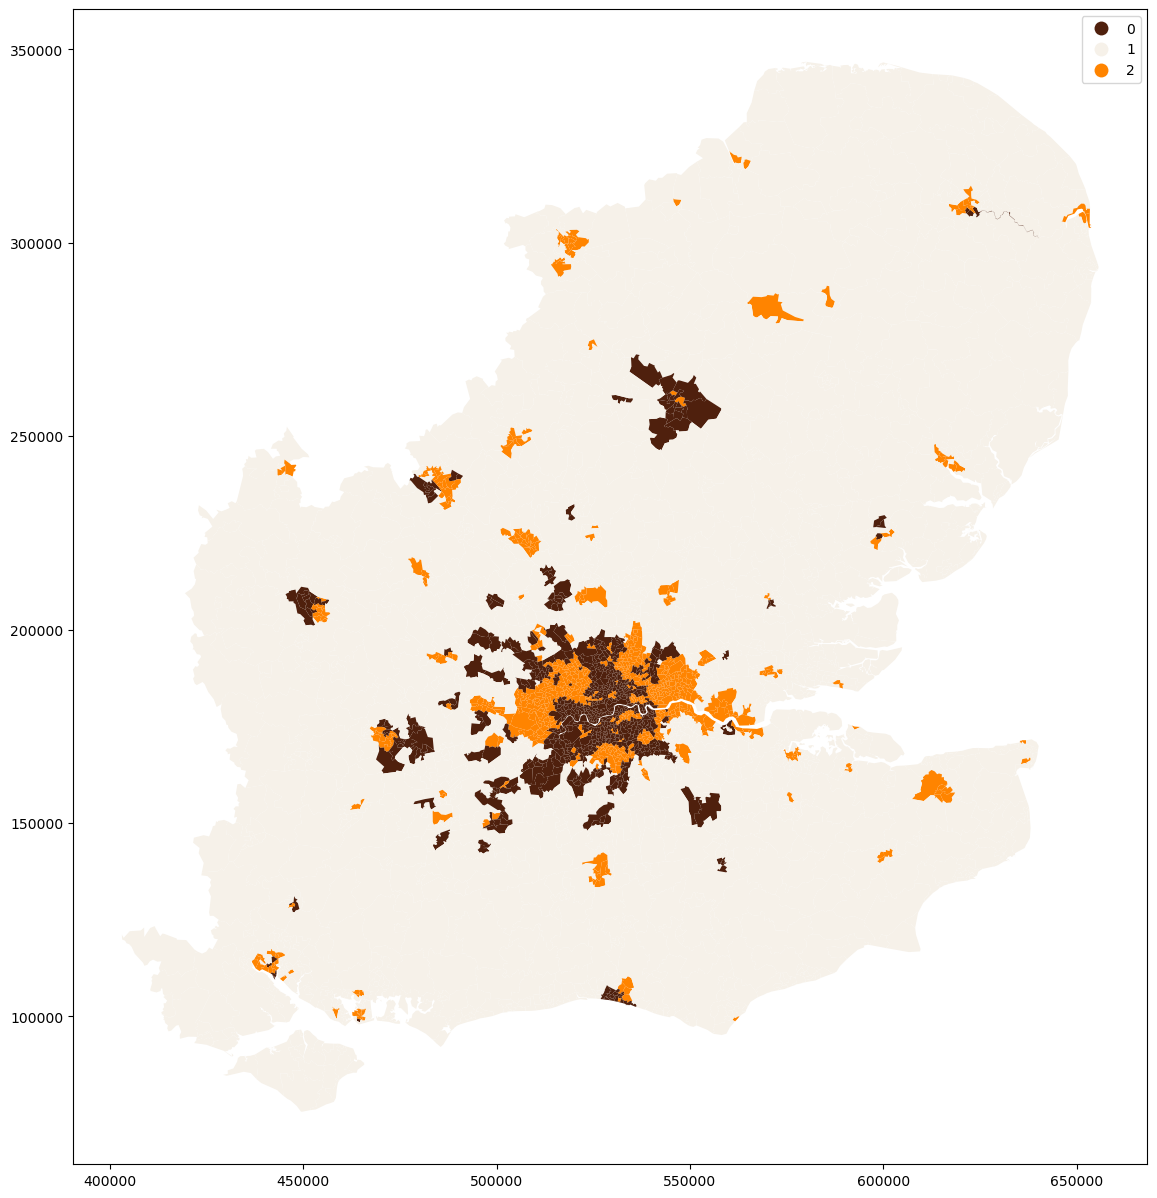

In [86]:
import matplotlib.colors as mcolors

colors = ['#4F200D','#F6F1E9', '#FF8400']
cmap_custom = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=len(colors))

def mapping_clusters(labels_cluster):
    mapping['kmeans_pred'] = labels_cluster
    mapping.plot(column='kmeans_pred', categorical=True, legend=True, figsize=(15,15), cmap=cmap_custom);

mapping_clusters(y_kmeans)


save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/Map_employee.png"
plt.savefig(save_path)

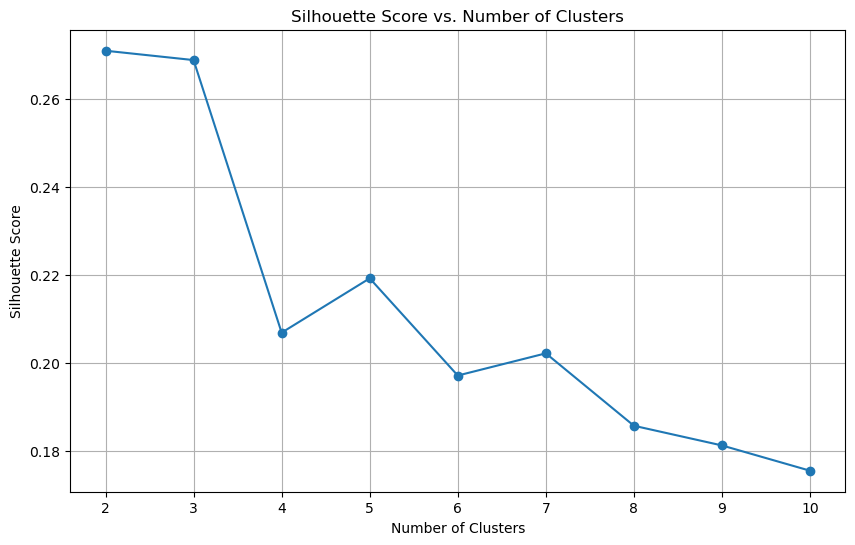

In [87]:
silhouette_scores = []

cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_kmeans)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)

save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/ss_employee.png"
plt.savefig(save_path)

plt.show()

## 8. Radar Plot

In [88]:
def radar_plot_cluster_centroids(df_cluster_centroid, y_range=None):
  
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    
    plt.figure(figsize=(25,15))
    plt.subplot(polar=True)
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        label = "Cluster {}".format(index)
        line_width = 1.5
        plt.plot(label_loc, centroid, label=label, linewidth=line_width)
    
    if y_range:
        plt.gca().set_ylim(y_range)
    
    plt.title('Cluster centroid comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        
    plt.show()

In [89]:
def plot_radar(df, group_col):
    categories = df[group_col].values
    num_categories = len(categories)
    
    # Create a polar plot
    plt.figure(figsize=(12, 12))
    plt.subplot(111, polar=True)
    
    # Define angles for each category
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
    angles += angles[:1]  # Ensure the plot is closed
    
    for idx, feature_col in enumerate(df.columns[1:]):
        values = df[feature_col].values.tolist()
        values += values[:1]  # Ensure the plot is closed
        
        # Plot the radar chart
        plt.plot(angles, values, label=feature_col)
        plt.fill(angles, values, alpha=0.25)
    
    plt.xticks(angles[:-1], categories)
    plt.title('Radar Chart')
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

    plot_radar(df, group_col)

# 

# 

# Clustering the Housing Features

## 1. Import Data

In [90]:
dwelling_types = pd.read_csv('https://raw.githubusercontent.com/ygong10/data/main/dwelling_types.csv')
number_of_rooms = pd.read_csv('https://raw.githubusercontent.com/ygong10/data/main/bedroom_number.csv')
Tenure = pd.read_csv('https://raw.githubusercontent.com/ygong10/data/main/tenure.csv')
house_price = pd.read_csv('https://raw.githubusercontent.com/ygong10/data/main/house_price.csv')
access_green = pd.read_csv('https://raw.githubusercontent.com/ygong10/data/main/access_green.csv')
occupancy_rating = pd.read_csv('https://raw.githubusercontent.com/ygong10/data/main/occupancy_rate.csv')

### Dwelling Types

In [91]:
dwelling_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 11 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   Middle layer Super Output Areas Code                                              2867 non-null   object
 1   Middle layer Super Output Areas                                                   2867 non-null   object
 2   Detached                                                                          2867 non-null   int64 
 3   Semi_detached                                                                     2867 non-null   int64 
 4   Terraced                                                                          2867 non-null   int64 
 5   In_a_purpose_built_block_of_flats_or_tenement                                     2867 non-null   int64 
 6   Part_of_

In [92]:
dwelling_types['detached']= dwelling_types['Detached']/dwelling_types['Total']
dwelling_types['semi_detached']= dwelling_types['Semi_detached']/dwelling_types['Total']
dwelling_types['terraced']= dwelling_types['Terraced']/dwelling_types['Total']
dwelling_types['flats_or_tenement']= dwelling_types['In_a_purpose_built_block_of_flats_or_tenement']/dwelling_types['Total']

In [93]:
dwelling_types.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas', 'Detached', 'Semi_detached',
       'Terraced', 'In_a_purpose_built_block_of_flats_or_tenement',
       'Part_of_a_converted_or_shared_house_including_bedsits',
       'Part_of_another_converted_building_for_example_former_school_church_or_warehouse',
       'In_a_commercial_building_for_example_in_an_office_building_hotel_or_over_a_shop',
       'A_caravan_or_other_mobile_or_temporary_structure', 'Total', 'detached',
       'semi_detached', 'terraced', 'flats_or_tenement'],
      dtype='object')

In [94]:
types = dwelling_types[['Middle layer Super Output Areas Code', 'detached',
                        'semi_detached', 'terraced', 'flats_or_tenement']]

### Number of Rooms

In [95]:
number_of_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Middle layer Super Output Areas Code  2867 non-null   object
 1   Middle layer Super Output Areas       2867 non-null   object
 2   1_bedroom                             2867 non-null   int64 
 3   2_bedrooms                            2867 non-null   int64 
 4   3_bedrooms                            2867 non-null   int64 
 5   4_or_more_bedrooms                    2867 non-null   int64 
 6   Total                                 2867 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 156.9+ KB


In [96]:
number_of_rooms['room_1']= number_of_rooms['1_bedroom']/number_of_rooms['Total']
number_of_rooms['room_2']= number_of_rooms['2_bedrooms']/number_of_rooms['Total']
number_of_rooms['room_3']= number_of_rooms['3_bedrooms']/number_of_rooms['Total']
number_of_rooms['room_4_more']= number_of_rooms['4_or_more_bedrooms']/number_of_rooms['Total']


In [97]:
number_of_rooms.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas', '1_bedroom', '2_bedrooms',
       '3_bedrooms', '4_or_more_bedrooms', 'Total', 'room_1', 'room_2',
       'room_3', 'room_4_more'],
      dtype='object')

In [98]:
rooms = number_of_rooms[['Middle layer Super Output Areas Code', 'room_1', 'room_2', 'room_3', 'room_4_more']]

### Tenure

In [99]:
Tenure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Middle layer Super Output Areas Code                 2867 non-null   object
 1   Middle layer Super Output Areas                      2867 non-null   object
 2   Owns_outright                                        2867 non-null   int64 
 3   Owns_with_a_mortgage_or_loan                         2867 non-null   int64 
 4   Shared_ownership                                     2867 non-null   int64 
 5   Social_rented_Rents_from_council_or_Local_Authority  2867 non-null   int64 
 6   Other_social_rented                                  2867 non-null   int64 
 7   Private_rented_Private_landlord_or_letting_agency    2867 non-null   int64 
 8   Other_private_rented                                 2867 non-null   int64 
 9

In [100]:
Tenure['Owns']= (Tenure['Owns_outright']+Tenure['Owns_with_a_mortgage_or_loan']+Tenure['Shared_ownership'])/Tenure['Total']
Tenure['Social_rented']= (Tenure['Social_rented_Rents_from_council_or_Local_Authority']+Tenure['Other_social_rented'])/Tenure['Total']
Tenure['Private_rented']= (Tenure['Owns_outright']+Tenure['Owns_with_a_mortgage_or_loan'])/Tenure['Total']


In [101]:
Tenure.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas', 'Owns_outright',
       'Owns_with_a_mortgage_or_loan', 'Shared_ownership',
       'Social_rented_Rents_from_council_or_Local_Authority',
       'Other_social_rented',
       'Private_rented_Private_landlord_or_letting_agency',
       'Other_private_rented', 'Lives_rent_free', 'Total', 'Owns',
       'Social_rented', 'Private_rented'],
      dtype='object')

In [102]:
tenure = Tenure[['Middle layer Super Output Areas Code','Owns',
                 'Social_rented', 'Private_rented']]

### House Price

In [103]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MSOA code  7201 non-null   object 
 1   MSOA name  7201 non-null   object 
 2   2018       7201 non-null   float64
 3   2019       7201 non-null   object 
 4   2020       7201 non-null   float64
 5   2021       7201 non-null   float64
 6   2022       7201 non-null   float64
dtypes: float64(4), object(3)
memory usage: 393.9+ KB


In [104]:
price = house_price[['MSOA code', '2021']]

### Access Green

In [105]:
access_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827 entries, 0 to 2826
Data columns (total 4 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MSOA code                                          2827 non-null   object 
 1   MSOA name                                          2827 non-null   object 
 2   Percentage_of_adresses_with_private_outdoor_space  2827 non-null   float64
 3   Average_size_of_private_outdoor_space_m2           2827 non-null   float64
dtypes: float64(2), object(2)
memory usage: 88.5+ KB


In [106]:
access_green = access_green.rename(columns={'Percentage_of_adresses_with_private_outdoor_space':'percentage_green'
                                           })
access_green.head(5)

MSOA code                 MSOA name  percentage_green  \
0  E02000001        City of London 001              0.07   
1  E02000002  Barking and Dagenham 001              0.77   
2  E02000003  Barking and Dagenham 002              0.86   
3  E02000004  Barking and Dagenham 003              0.93   
4  E02000005  Barking and Dagenham 004              0.95   

   Average_size_of_private_outdoor_space_m2  
0                                     110.0  
1                                     663.7  
2                                     169.9  
3                                     190.2  
4                                     136.6

In [107]:
green = access_green[['MSOA code','percentage_green']]

### Occupancy Rating

In [108]:
occupancy_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Middle layer Super Output Areas Code  2867 non-null   object
 1   Middle layer Super Output Areas       2867 non-null   object
 2   Occupancy_rating_of_rooms_+2_or_more  2867 non-null   int64 
 3   Occupancy_rating_of_rooms_+1          2867 non-null   int64 
 4   Occupancy_rating_of_rooms_0           2867 non-null   int64 
 5   Occupancy_rating_of_rooms_-1          2867 non-null   int64 
 6   Occupancy_rating_of_rooms_-2_or_less  2867 non-null   int64 
 7   Total                                 2867 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 179.3+ KB


In [109]:
occupancy_rating['Occupancy_rating_4']= occupancy_rating['Occupancy_rating_of_rooms_+2_or_more']/Tenure['Total']
occupancy_rating['Occupancy_rating_3']= occupancy_rating['Occupancy_rating_of_rooms_+1']/Tenure['Total']
occupancy_rating['Occupancy_rating_2']= occupancy_rating['Occupancy_rating_of_rooms_0']/Tenure['Total']
occupancy_rating['Occupancy_rating_1']= occupancy_rating['Occupancy_rating_of_rooms_-1']/Tenure['Total']
occupancy_rating['Occupancy_rating_0']= occupancy_rating['Occupancy_rating_of_rooms_-2_or_less']/Tenure['Total']


In [110]:
occupancy_rating.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas',
       'Occupancy_rating_of_rooms_+2_or_more', 'Occupancy_rating_of_rooms_+1',
       'Occupancy_rating_of_rooms_0', 'Occupancy_rating_of_rooms_-1',
       'Occupancy_rating_of_rooms_-2_or_less', 'Total', 'Occupancy_rating_4',
       'Occupancy_rating_3', 'Occupancy_rating_2', 'Occupancy_rating_1',
       'Occupancy_rating_0'],
      dtype='object')

In [111]:
occupancy = occupancy_rating[['Middle layer Super Output Areas Code',
                              'Occupancy_rating_4', 'Occupancy_rating_3', 'Occupancy_rating_2', 
                              'Occupancy_rating_1', 'Occupancy_rating_0']]

### Location

In [112]:
import geopandas as gpd  

msoa_gdf = gpd.read_file('/Users/yobin/Downloads/MSOA_Dec_2001.geojson')
railway_stations_gdf = gpd.read_file('/Users/yobin/Downloads/export.geojson')

In [113]:
print(msoa_gdf.crs)

epsg:27700


In [114]:
msoa_location = msoa_gdf.to_crs(epsg=4326) 

In [115]:

msoa = msoa_location[['MSOA01CD', 'geometry']]
railway_stations_data = railway_stations_gdf[['name', 'geometry']]

In [116]:
msoa

MSOA01CD                                           geometry
0     E02000001  POLYGON ((-0.09653 51.52295, -0.09647 51.52282...
1     E02000002  POLYGON ((0.14807 51.59656, 0.14806 51.59640, ...
2     E02000003  POLYGON ((0.14844 51.58083, 0.14838 51.58075, ...
3     E02000004  POLYGON ((0.18508 51.56480, 0.18476 51.56454, ...
4     E02000005  POLYGON ((0.15183 51.56779, 0.15191 51.56774, ...
...         ...                                                ...
7189  W02000409  POLYGON ((-3.27512 51.47768, -3.27510 51.47768...
7190  W02000410  POLYGON ((-3.18303 51.47558, -3.18268 51.47558...
7191  W02000411  POLYGON ((-3.24681 51.47635, -3.24654 51.47603...
7192  W02000412  MULTIPOLYGON (((-3.20267 51.45946, -3.20248 51...
7193  W02000413  MULTIPOLYGON (((-3.15856 51.45111, -3.15870 51...

[7194 rows x 2 columns]

In [117]:
sort_msoa = types.merge(msoa, how='left', left_on='Middle layer Super Output Areas Code', right_on='MSOA01CD')
sort_msoa

Middle layer Super Output Areas Code  detached  semi_detached  terraced  \
0                               E02000001  0.001425       0.003053  0.015873   
1                               E02000002  0.044948       0.272822  0.282578   
2                               E02000003  0.044795       0.273607  0.357088   
3                               E02000004  0.043309       0.388913  0.426592   
4                               E02000005  0.059261       0.223815  0.575524   
...                                   ...       ...            ...       ...   
2862                            E02007112  0.002057       0.003428  0.013713   
2863                            E02007113  0.003061       0.006122  0.027242   
2864                            E02007114  0.005609       0.022105  0.061036   
2865                            E02007115  0.005590       0.007156  0.033766   
2866                            E02007116  0.061410       0.281250  0.274709   

      flats_or_tenement   MSOA01CD  \
0              0.869556  E02000001   
1              0.382927  E02000002   
2              0.254009  E02000003   
3              0.116501  E02000004   
4              0.101433  E02000005   
...                 ...        ...   
2862           0.968804        NaN   
2863           0.931129        NaN   
2864           0.880897        NaN   
2865           0.777952        NaN   
2866           0.306323        NaN   

                                               geometry  
0     POLYGON ((-0.09653 51.52295, -0.09647 51.52282...  
1     POLYGON ((0.14807 51.59656, 0.14806 51.59640, ...  
2     POLYGON ((0.14844 51.58083, 0.14838 51.58075, ...  
3     POLYGON ((0.18508 51.56480, 0.18476 51.56454, ...  
4     POLYGON ((0.15183 51.56779, 0.15191 51.56774, ...  
...                                                 ...  
2862                                               None  
2863                                               None  
2864                                               None  
2865                                               None  
2866                                               None  

[2867 rows x 7 columns]

In [118]:
missing_values = sort_msoa.isnull()

missing_count = missing_values.sum()
print(missing_count)

Middle layer Super Output Areas Code      0
detached                                  0
semi_detached                             0
terraced                                  0
flats_or_tenement                         0
MSOA01CD                                148
geometry                                148
dtype: int64


In [119]:
clean_msoa = sort_msoa.dropna()
clean_msoa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719 entries, 0 to 2718
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Middle layer Super Output Areas Code  2719 non-null   object  
 1   detached                              2719 non-null   float64 
 2   semi_detached                         2719 non-null   float64 
 3   terraced                              2719 non-null   float64 
 4   flats_or_tenement                     2719 non-null   float64 
 5   MSOA01CD                              2719 non-null   object  
 6   geometry                              2719 non-null   geometry
dtypes: float64(4), geometry(1), object(2)
memory usage: 169.9+ KB


In [120]:
clean_msoa.columns

Index(['Middle layer Super Output Areas Code', 'detached', 'semi_detached',
       'terraced', 'flats_or_tenement', 'MSOA01CD', 'geometry'],
      dtype='object')

In [121]:
msoa_data = clean_msoa.drop(['Middle layer Super Output Areas Code', 'detached', 
                             'semi_detached', 'terraced', 'flats_or_tenement'], axis =1)

In [122]:
msoa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719 entries, 0 to 2718
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MSOA01CD  2719 non-null   object  
 1   geometry  2719 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 63.7+ KB


In [123]:
railway_stations_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      3568 non-null   object  
 1   geometry  3614 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 56.6+ KB


In [124]:
from scipy.spatial import cKDTree

station_coordinates = np.vstack(railway_stations_data['geometry'].apply(lambda geom: (geom.x, geom.y)))
tree = cKDTree(station_coordinates)

distance_data = pd.DataFrame(columns=['MSOA01CD', 'name', 'Distance'])

for msoa_index, msoa_row in msoa_data.iterrows():
    msoa_coordinates = (msoa_row['geometry'].centroid.x, msoa_row['geometry'].centroid.y)
    
    nearest_station_distance, nearest_station_index = tree.query(msoa_coordinates)
    nearest_station_name = railway_stations_data.iloc[nearest_station_index]['name']
    
    distance_data = distance_data.append({
        'MSOA01CD': msoa_row['MSOA01CD'],
        'name': nearest_station_name,
        'Distance': nearest_station_distance
    }, ignore_index=True)

In [125]:
distance_data

MSOA01CD            name  Distance
0     E02000001            Bank  0.003245
1     E02000002  Chadwell Heath  0.023281
2     E02000003  Chadwell Heath  0.014669
3     E02000004   Dagenham East  0.016493
4     E02000005  Chadwell Heath  0.016666
...         ...             ...       ...
2714  E02006629   East Worthing  0.005430
2715  E02006630   West Worthing  0.009766
2716  E02006631        Worthing  0.009977
2717  E02006632   West Worthing  0.009100
2718  E02006633   Goring-by-Sea  0.011212

[2719 rows x 3 columns]

In [126]:

missing_values = distance_data.isnull()

missing_count = missing_values.sum()
print(missing_count)

MSOA01CD     0
name        16
Distance     0
dtype: int64


In [127]:
distance = distance_data.drop(['name'], axis = 1)

In [128]:
distance.to_csv('/Users/yobin/Downloads/distances.csv', index=False)

In [129]:
dff1 = types.merge(rooms, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
dff2 = dff1.merge(tenure, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
dff3 = dff2.merge(price, how='left', left_on='Middle layer Super Output Areas Code', right_on='MSOA code')
dff4 = dff3.merge(green, how='left', left_on='Middle layer Super Output Areas Code', right_on='MSOA code')
dff5 = dff4.merge(occupancy, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
dff6 = dff5.merge(distance, how='left', left_on='Middle layer Super Output Areas Code', right_on='MSOA01CD')


In [130]:
dff6.head(3)

Middle layer Super Output Areas Code  detached  semi_detached  terraced  \
0                            E02000001  0.001425       0.003053  0.015873   
1                            E02000002  0.044948       0.272822  0.282578   
2                            E02000003  0.044795       0.273607  0.357088   

   flats_or_tenement    room_1    room_2    room_3  room_4_more      Owns  \
0           0.869556  0.534283  0.321058  0.106205     0.038454  0.367521   
1           0.382927  0.119512  0.379094  0.410105     0.091289  0.434146   
2           0.254009  0.110433  0.276081  0.461578     0.151908  0.562341   

   ...      2021  MSOA code_y percentage_green  Occupancy_rating_4  \
0  ...  937692.0    E02000001             0.07            0.126781   
1  ...  337826.0    E02000002             0.77            0.190244   
2  ...  369964.0    E02000003             0.86            0.339695   

  Occupancy_rating_3  Occupancy_rating_2  Occupancy_rating_1  \
0           0.250509            0.453602            0.158730   
1           0.242857            0.353659            0.169338   
2           0.241730            0.266667            0.108651   

   Occupancy_rating_0   MSOA01CD  Distance  
0            0.010379  E02000001  0.003245  
1            0.043902  E02000002  0.023281  
2            0.043257  E02000003  0.014669  

[3 rows x 23 columns]

In [131]:
dff6.columns

Index(['Middle layer Super Output Areas Code', 'detached', 'semi_detached',
       'terraced', 'flats_or_tenement', 'room_1', 'room_2', 'room_3',
       'room_4_more', 'Owns', 'Social_rented', 'Private_rented', 'MSOA code_x',
       '2021', 'MSOA code_y', 'percentage_green', 'Occupancy_rating_4',
       'Occupancy_rating_3', 'Occupancy_rating_2', 'Occupancy_rating_1',
       'Occupancy_rating_0', 'MSOA01CD', 'Distance'],
      dtype='object')

In [132]:
dff6 = dff6.rename(columns={'2021':'house_price'})


In [133]:
dataset = dff6.drop(['MSOA code_x','MSOA code_y','MSOA01CD'], axis =1)
dataset.head(3)

Middle layer Super Output Areas Code  detached  semi_detached  terraced  \
0                            E02000001  0.001425       0.003053  0.015873   
1                            E02000002  0.044948       0.272822  0.282578   
2                            E02000003  0.044795       0.273607  0.357088   

   flats_or_tenement    room_1    room_2    room_3  room_4_more      Owns  \
0           0.869556  0.534283  0.321058  0.106205     0.038454  0.367521   
1           0.382927  0.119512  0.379094  0.410105     0.091289  0.434146   
2           0.254009  0.110433  0.276081  0.461578     0.151908  0.562341   

   Social_rented  Private_rented  house_price  percentage_green  \
0       0.148555        0.365079     937692.0              0.07   
1       0.417770        0.430662     337826.0              0.77   
2       0.132824        0.556234     369964.0              0.86   

   Occupancy_rating_4  Occupancy_rating_3  Occupancy_rating_2  \
0            0.126781            0.250509            0.453602   
1            0.190244            0.242857            0.353659   
2            0.339695            0.241730            0.266667   

   Occupancy_rating_1  Occupancy_rating_0  Distance  
0            0.158730            0.010379  0.003245  
1            0.169338            0.043902  0.023281  
2            0.108651            0.043257  0.014669

## 2. Exploratory Data Analysis (EDA)

In [134]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Middle layer Super Output Areas Code  2867 non-null   object 
 1   detached                              2867 non-null   float64
 2   semi_detached                         2867 non-null   float64
 3   terraced                              2867 non-null   float64
 4   flats_or_tenement                     2867 non-null   float64
 5   room_1                                2867 non-null   float64
 6   room_2                                2867 non-null   float64
 7   room_3                                2867 non-null   float64
 8   room_4_more                           2867 non-null   float64
 9   Owns                                  2867 non-null   float64
 10  Social_rented                         2867 non-null   float64
 11  Private_rented   

In [135]:
dataset = dataset.dropna()

In [136]:
hf = dataset.set_index('Middle layer Super Output Areas Code').copy()

In [137]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2719 entries, E02000001 to E02006633
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   detached            2719 non-null   float64
 1   semi_detached       2719 non-null   float64
 2   terraced            2719 non-null   float64
 3   flats_or_tenement   2719 non-null   float64
 4   room_1              2719 non-null   float64
 5   room_2              2719 non-null   float64
 6   room_3              2719 non-null   float64
 7   room_4_more         2719 non-null   float64
 8   Owns                2719 non-null   float64
 9   Social_rented       2719 non-null   float64
 10  Private_rented      2719 non-null   float64
 11  house_price         2719 non-null   float64
 12  percentage_green    2719 non-null   float64
 13  Occupancy_rating_4  2719 non-null   float64
 14  Occupancy_rating_3  2719 non-null   float64
 15  Occupancy_rating_2  2719 non-null   float64
 16

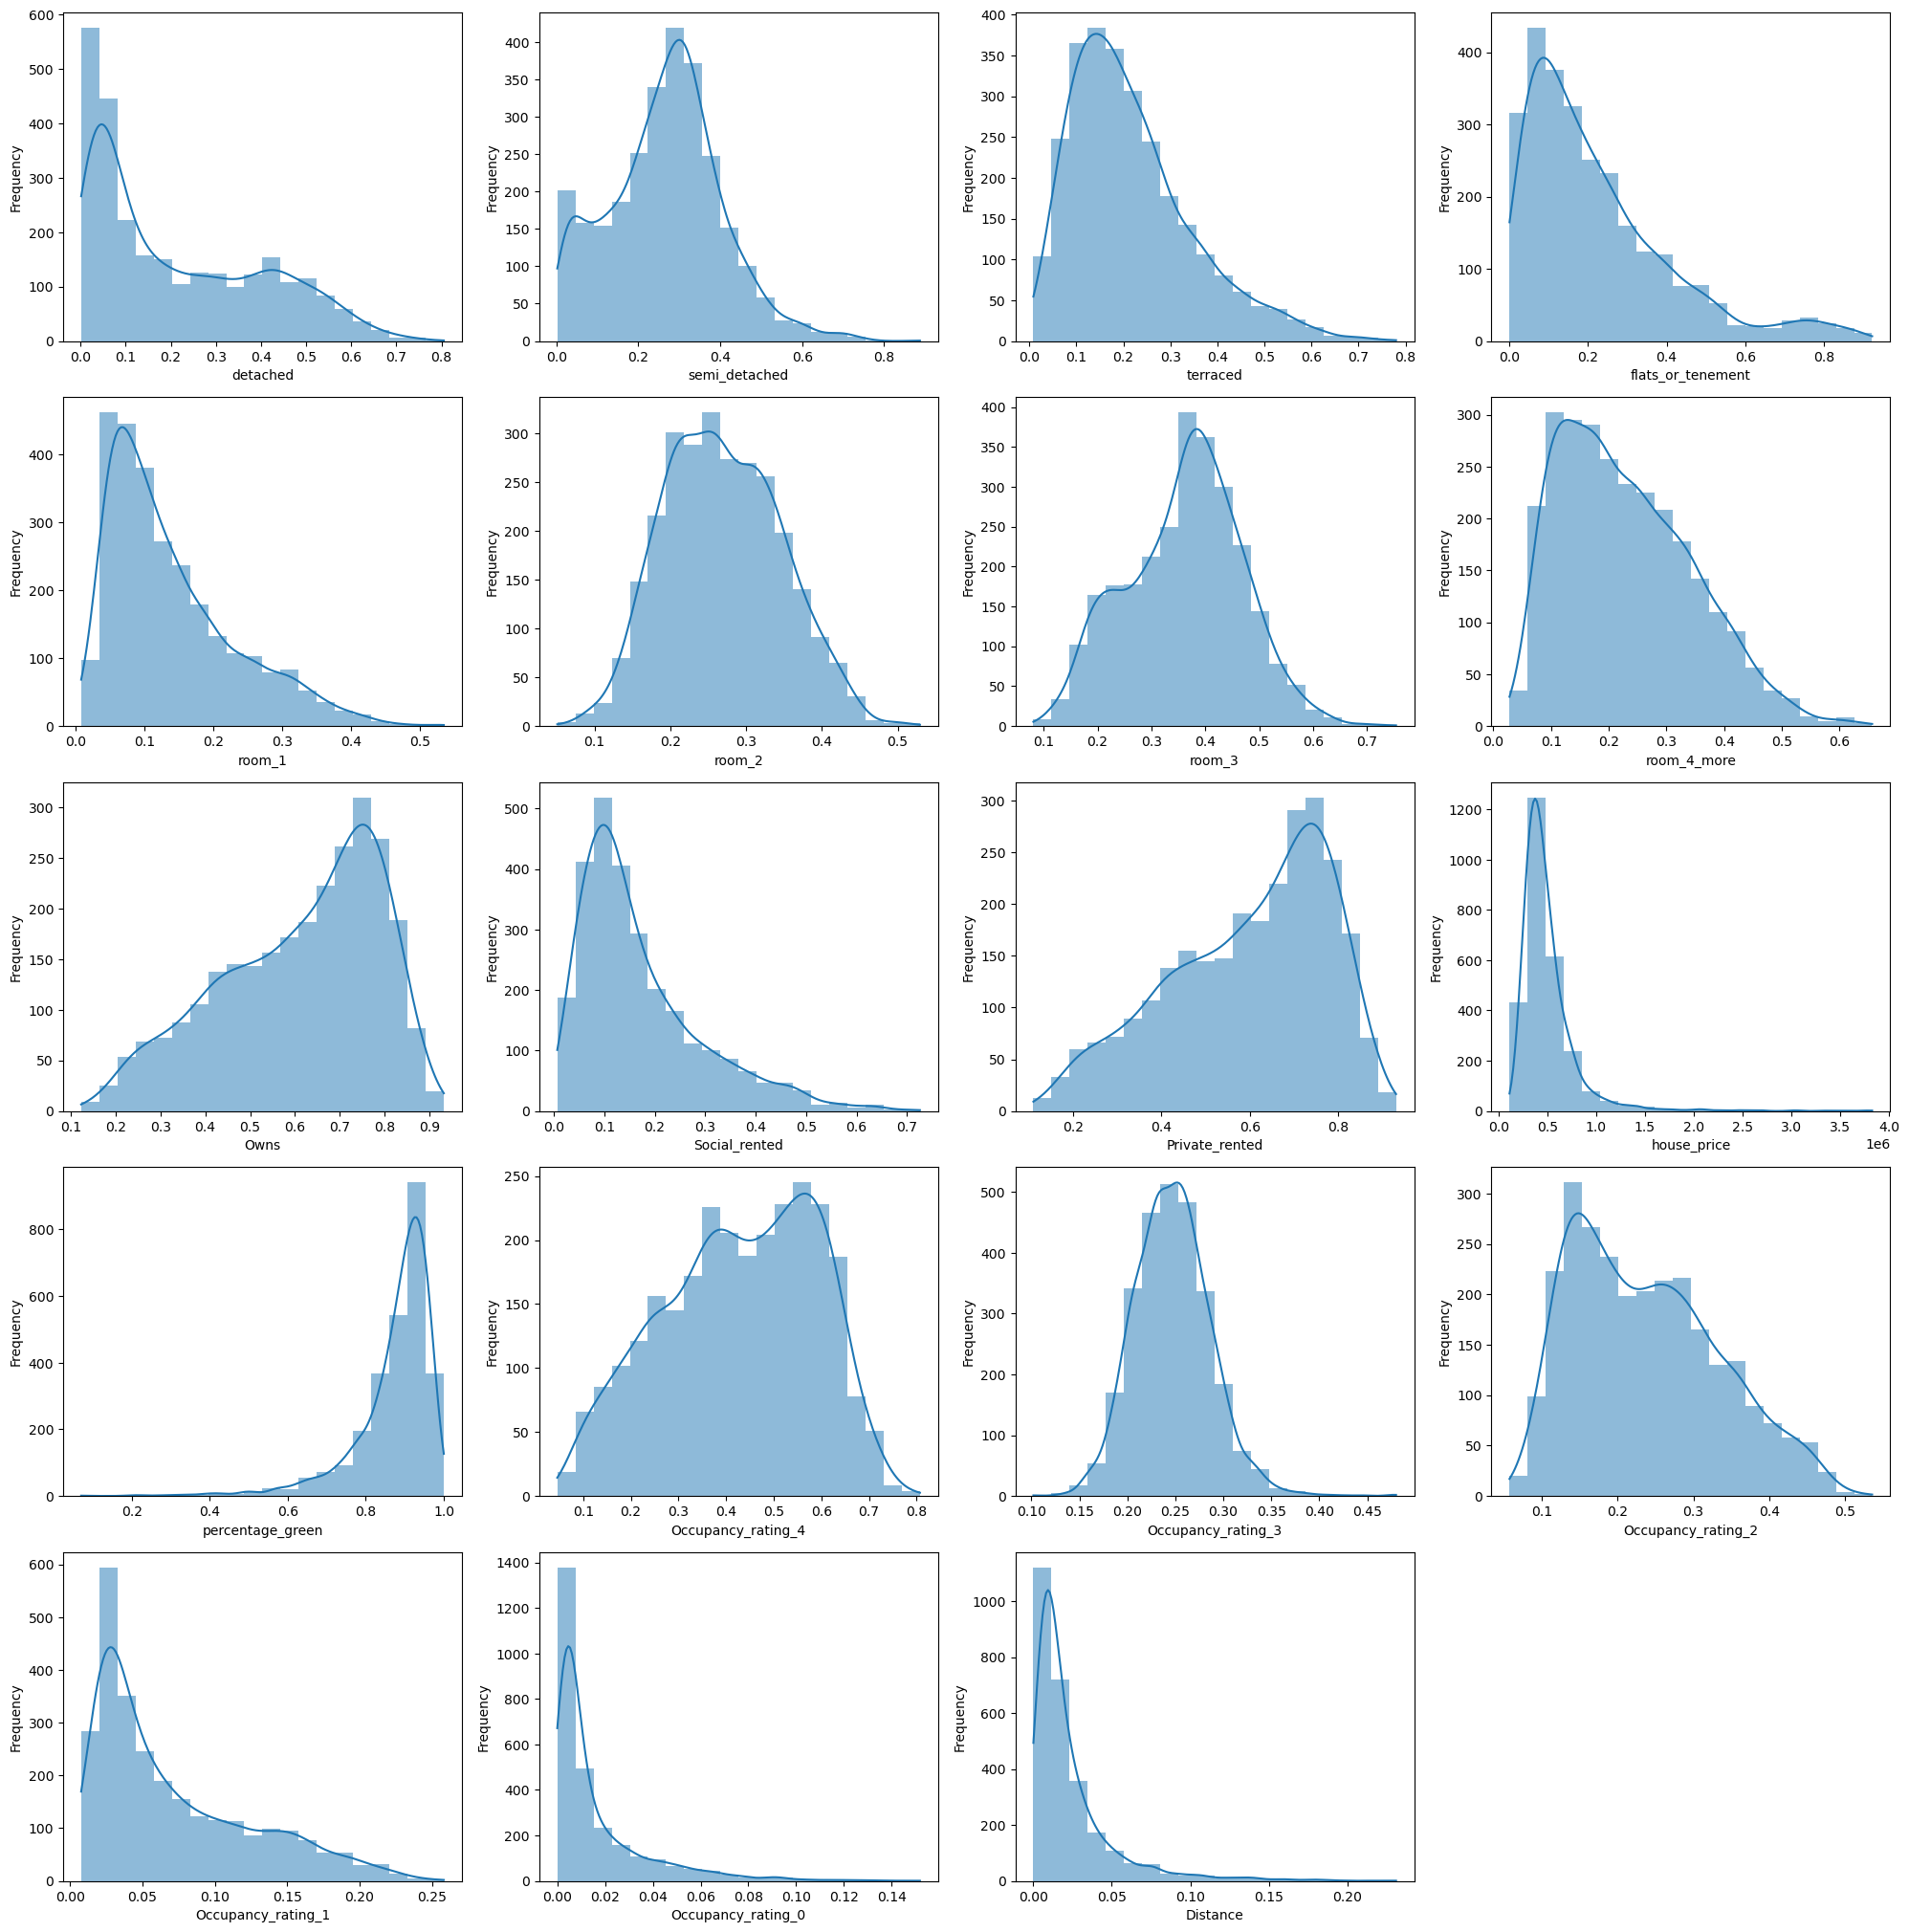

In [138]:
plt.figure(figsize=(20,40))

rows = len(hf.columns) // 2 + len(hf.columns) % 2
cols = 4

for i, column in enumerate(hf.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data=hf, x=column, bins=20, kde=True, linewidth= 0)  # 调整 linewidth 参数
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

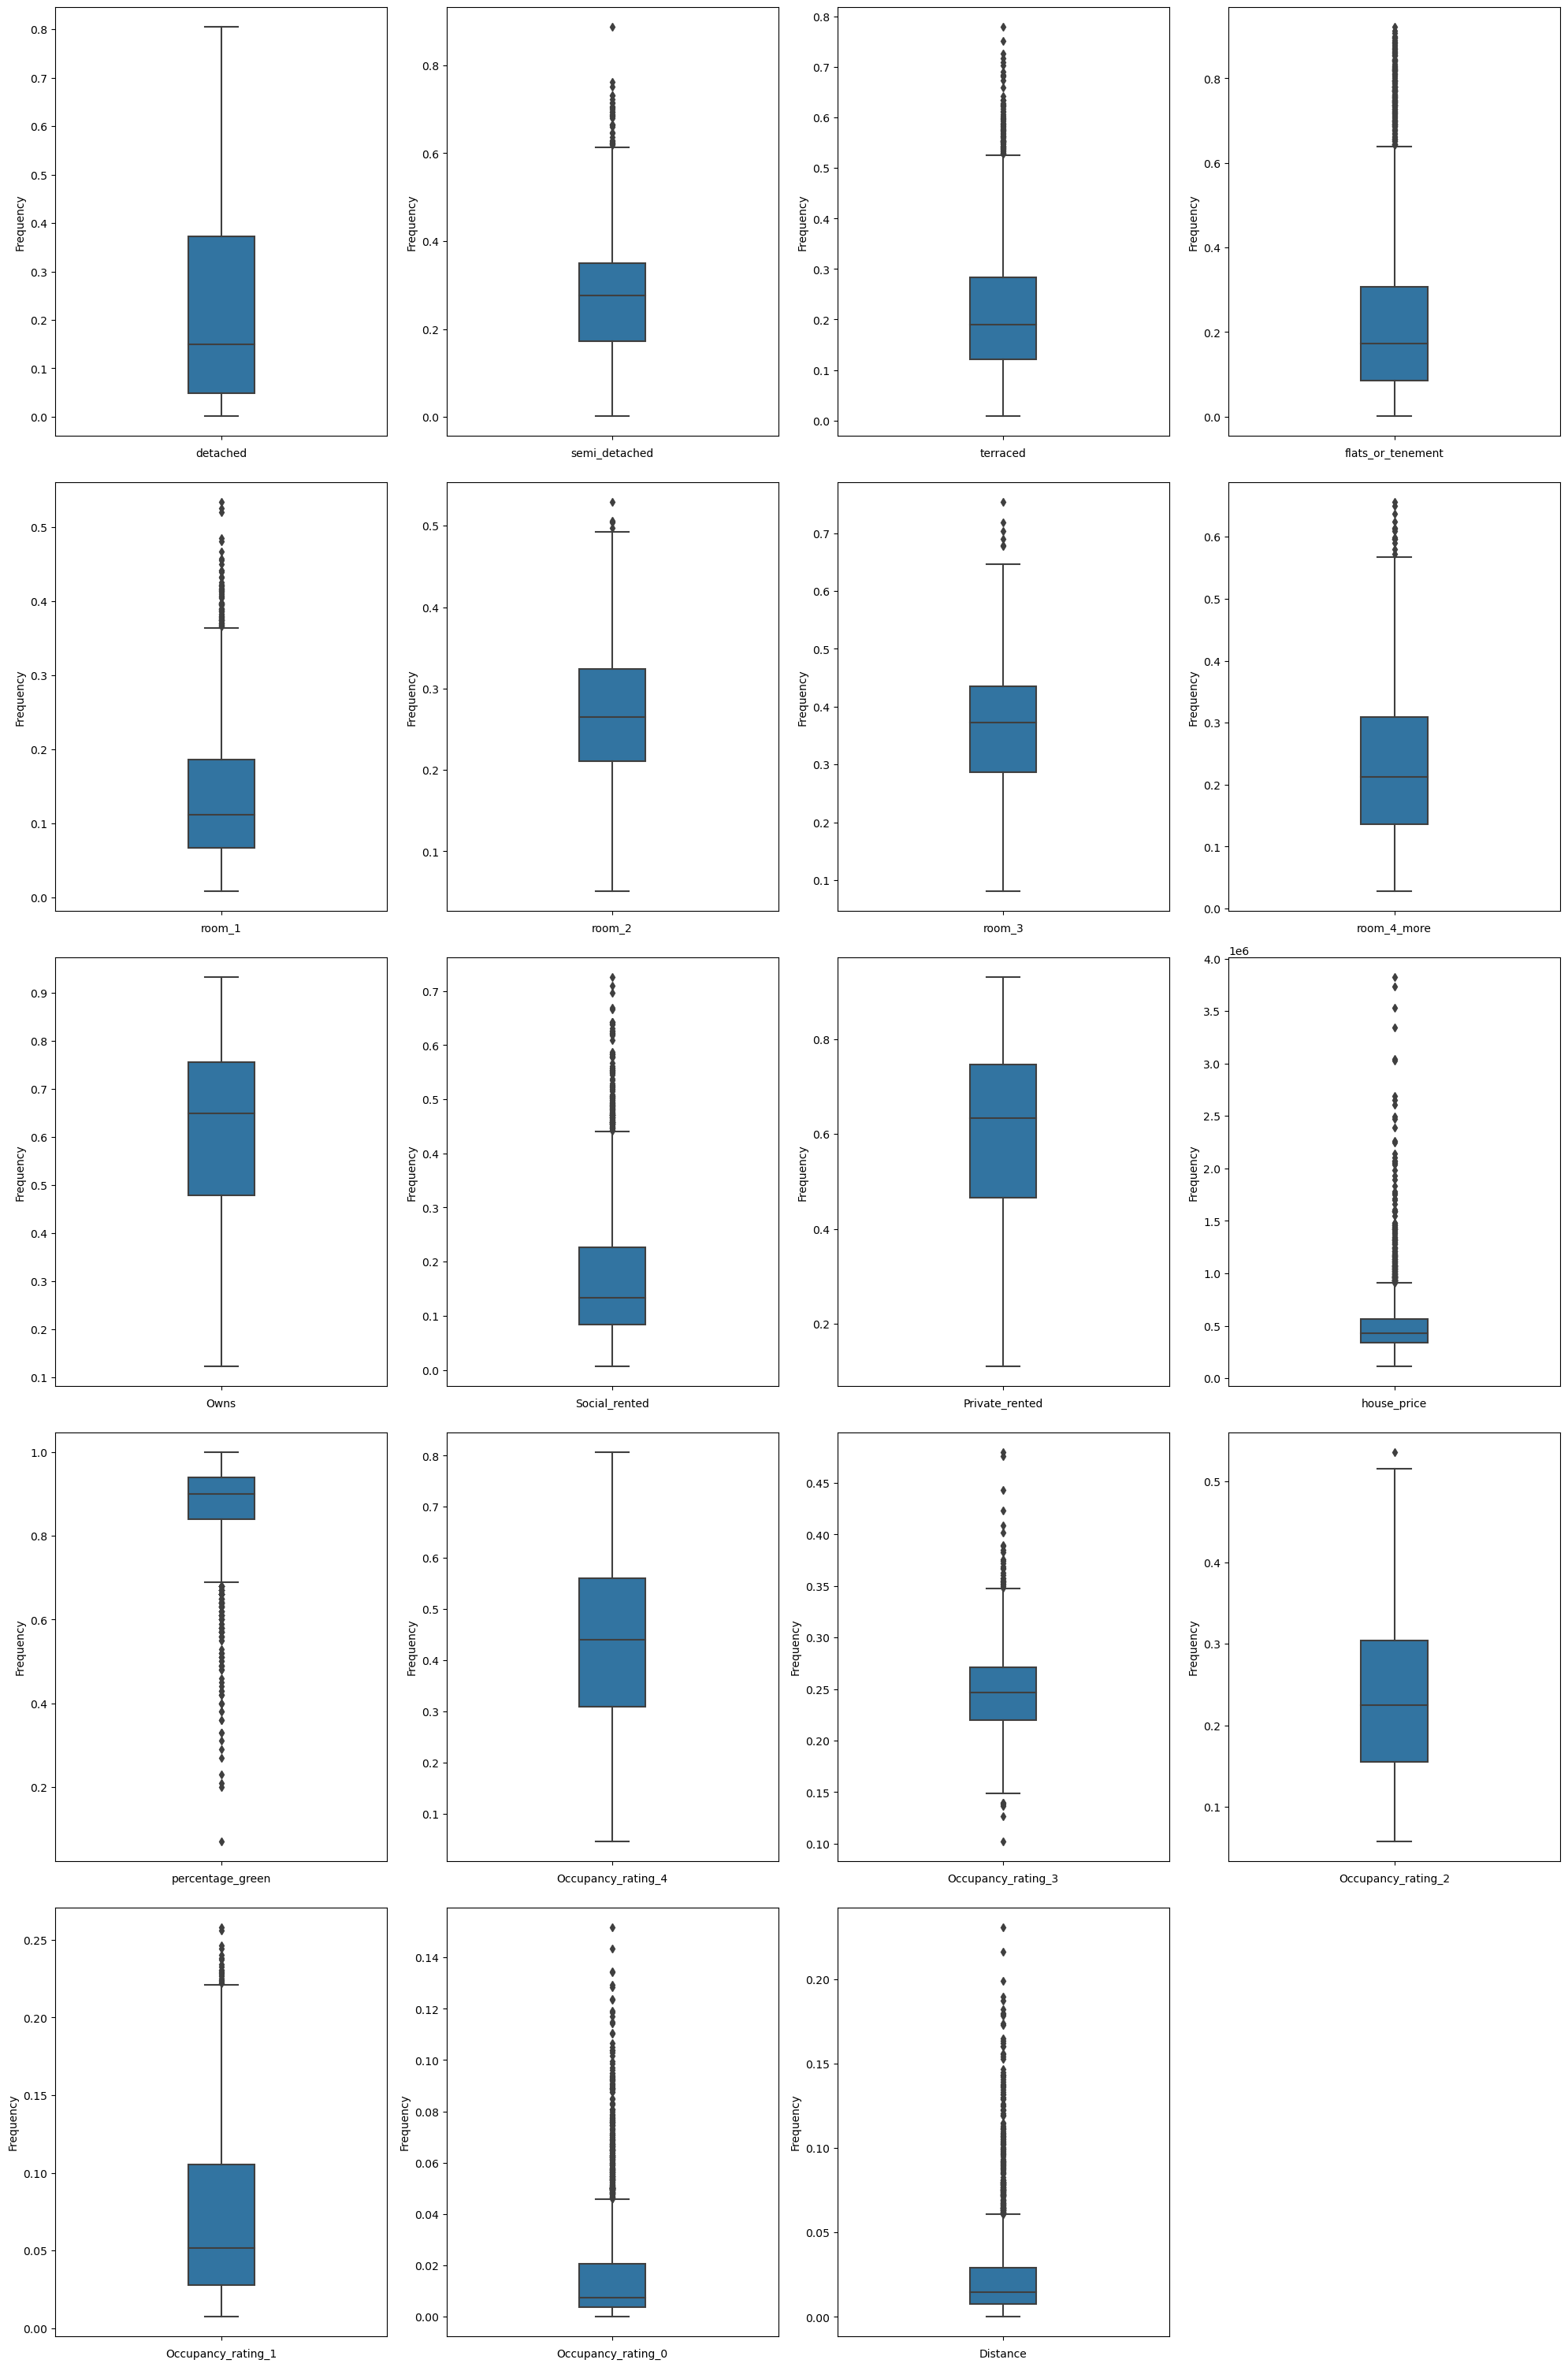

In [139]:
plt.figure(figsize=(20, 60))

rows = len(hf.columns) // 2 + len(hf.columns) % 2
cols = 4

for i, column in enumerate(hf.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=hf, y=column, width=0.2)  # 调整 linewidth 参数
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

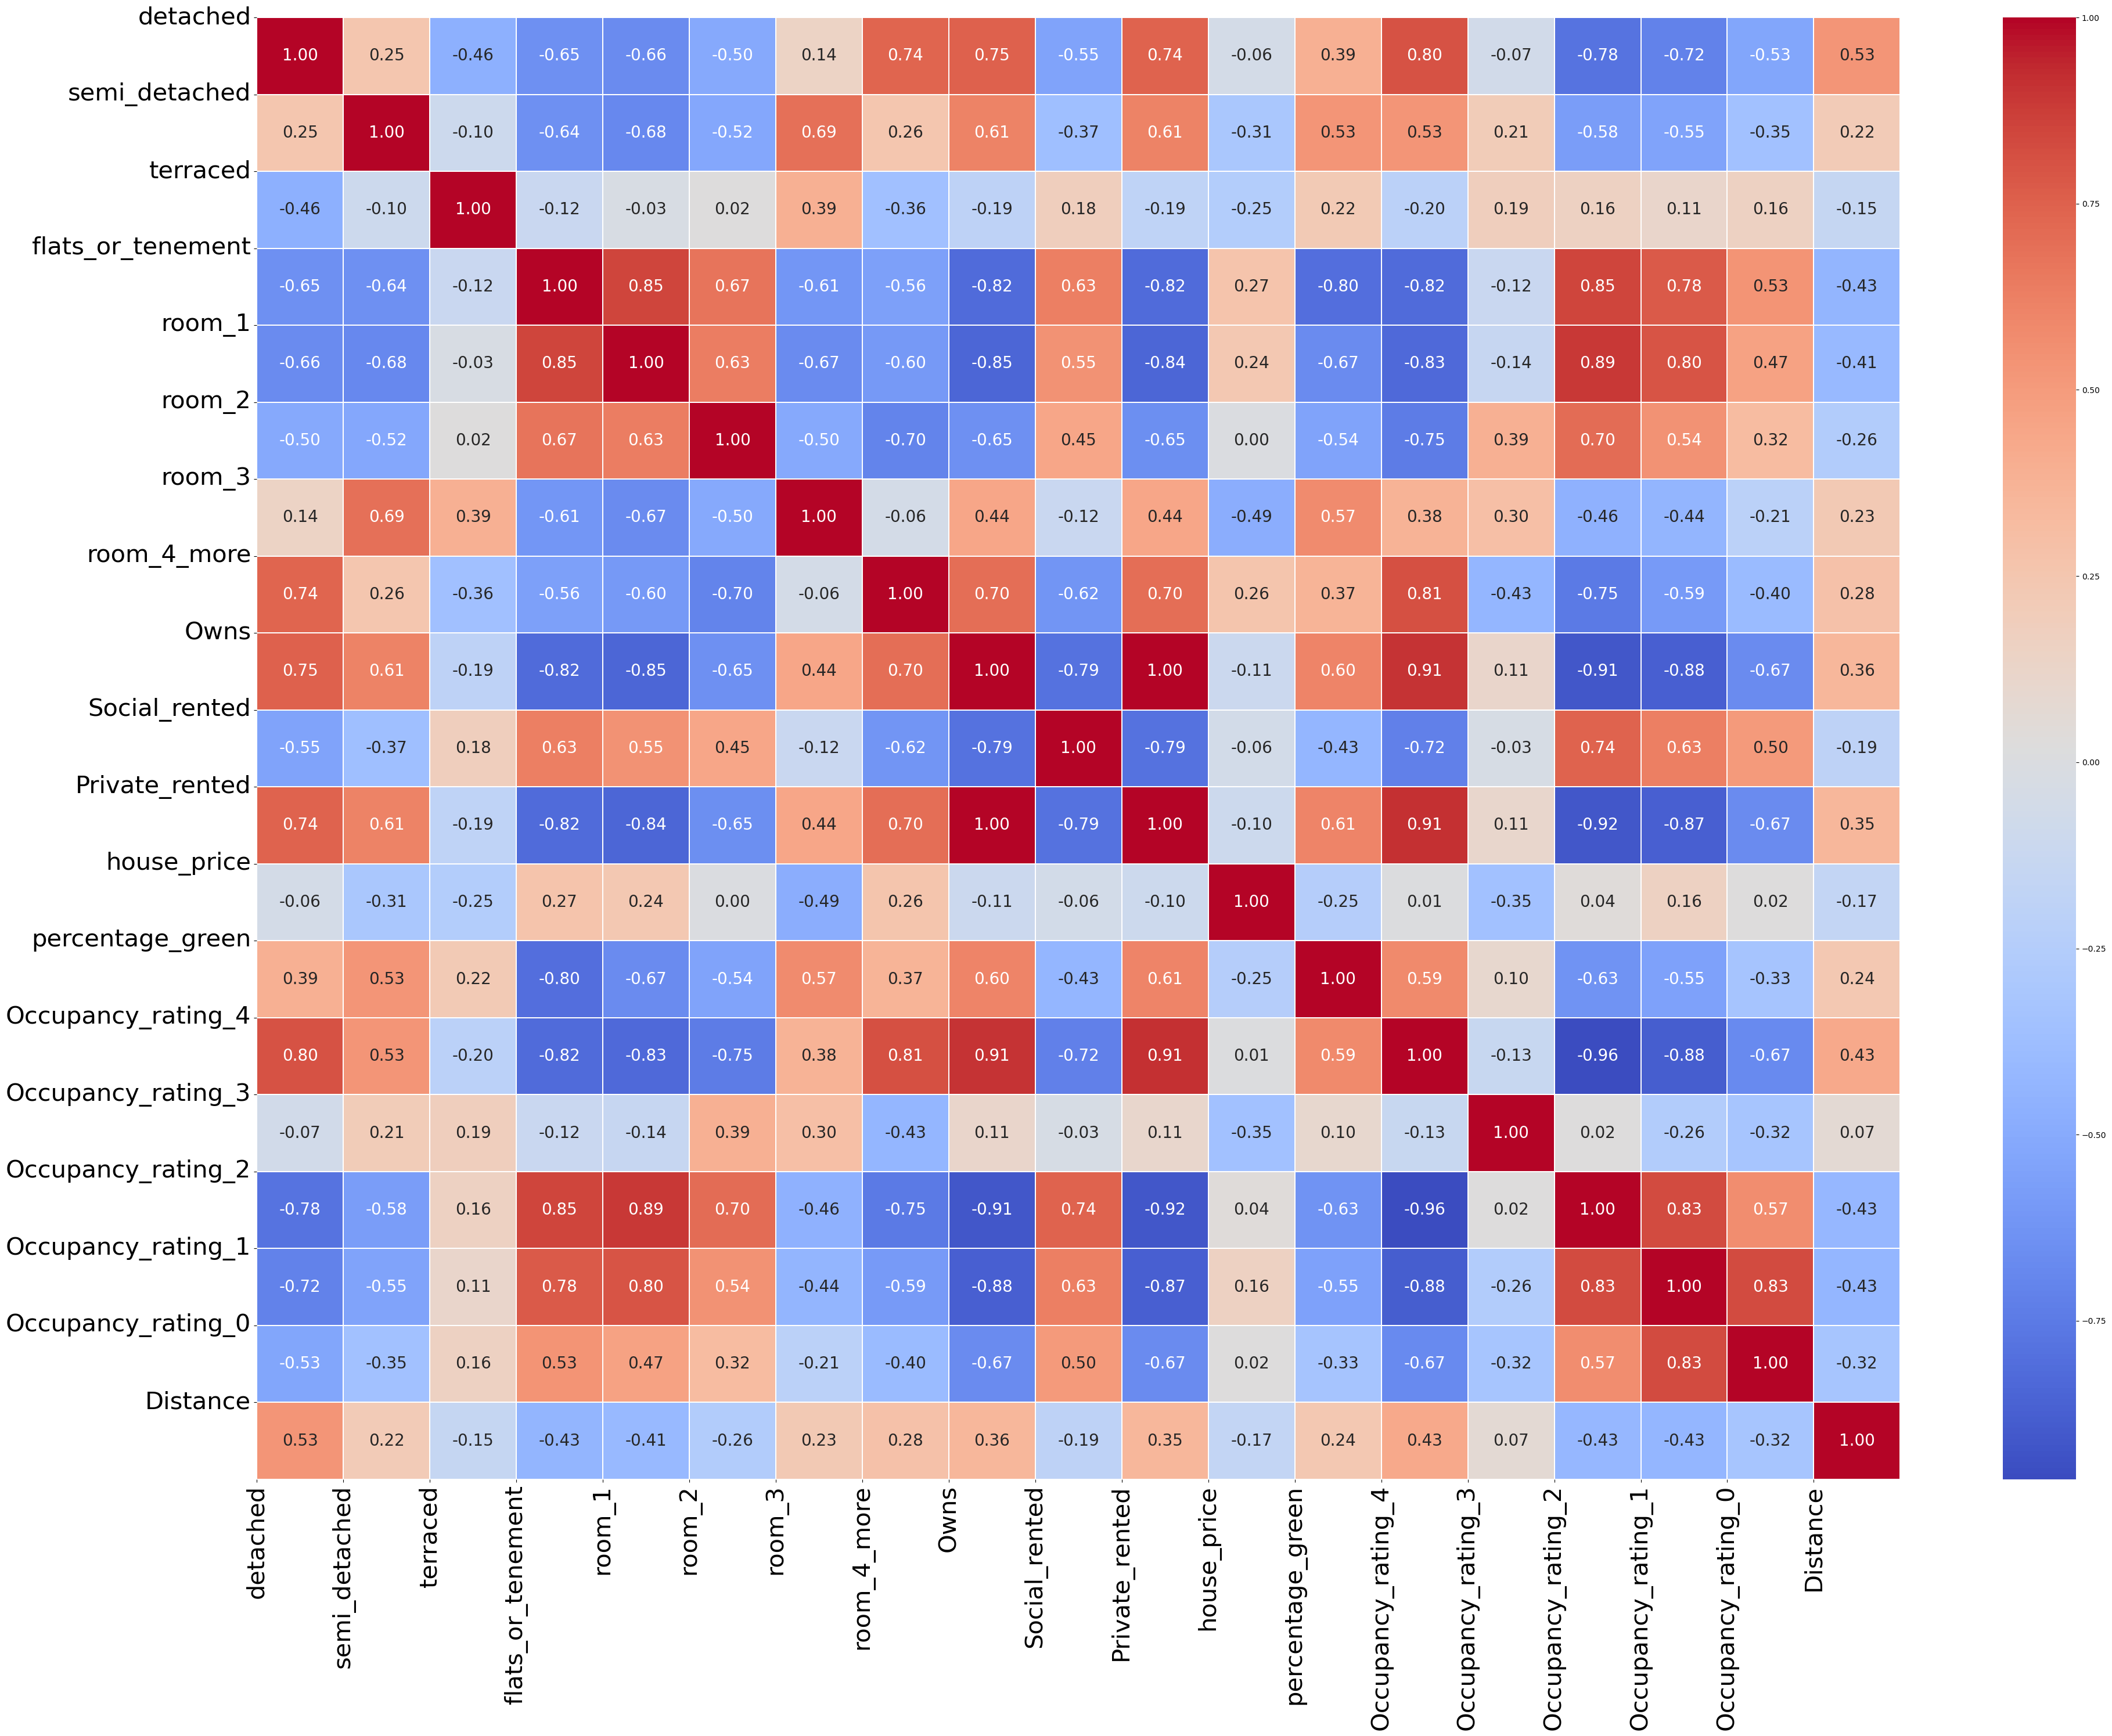

In [140]:
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(40, 30))

sns.heatmap(hf.corr(),
            linewidths = 0.1,
            annot=True,
            fmt=".2f", 
            cmap='coolwarm',
            annot_kws={"fontsize":20}) 
plt.xticks(range(hf.shape[1]), hf.columns, fontsize=30, rotation = 90)
plt.yticks(range(hf.shape[1]), hf.columns, fontsize=30)
plt.tight_layout()

plt.show()

## 3. Feature Engineering

### Log Transform

In [141]:
# Update features list
house_features = ['detached', 'semi_detached', 'terraced', 'flats_or_tenement', 'room_1',
       'room_2', 'room_3', 'room_4_more', 'Owns', 'Social_rented',
       'Private_rented', 'house_price', 'percentage_green',
       'Occupancy_rating_4', 'Occupancy_rating_3', 'Occupancy_rating_2',
       'Occupancy_rating_1', 'Occupancy_rating_0', 'Distance']

In [142]:
feature_skew_dict = {
    "detached": "right",
    "semi_detached": "right",
    "terraced": "right", 
    "flats_or_tenement": "right", 
    "room_1": "right",
    "room_4_more": "right",
    "Social_rented": "right",
    "house_price": "right",
    "Occupancy_rating_2": "right",
    "Occupancy_rating_1": "right",
    "Occupancy_rating_0": "right",
    "Distance": "right",
    "Owns": "left",
    "Private_rented": "left",
    "Occupancy_rating_4": "left",
}

log_transform(hf, feature_skew_dict)

### Outliers (IQR Method)

In [143]:
def iqr_outliers(hf, house_features):
    for feature in house_features:
        sorted_data = sorted(hf[feature].dropna())
        q1, q3 = np.percentile(sorted_data, [25, 75])
        iqr = q3 - q1
        _lower = round(q1 - (1.5 * iqr), 4)
        _upper = round(q3 + (1.5 * iqr), 4)
        hf[feature] = hf[feature].apply(lambda x: np.where(x < _lower, np.nan, x))
        hf[feature] = hf[feature].apply(lambda x: np.where(x > _upper, np.nan, x))
        outliers_dict[feature] = {
            "min_max": {"1_min": round(hf[feature].min(), 4),  "2_max": round(hf[feature].max(), 4)},
            "iqr_bounds": {"1_lower": _lower, "2_upper": _upper}, 
        }

In [144]:
# Replace outliers identified via IQR method with NaNs
outliers_dict = dict()
iqr_outliers(hf, house_features)

### StandardScaler

In [145]:
def standard_scale(hf, house_features):
    z_scored = StandardScaler()
    hf[house_features] = z_scored.fit_transform(hf[house_features])

In [146]:
standard_scale(hf, house_features)

### IterativeImputer

In [147]:
def impute_nans(hf, house_features, method="iterative"):
    if method == "iterative":
            iterative_imputer = IterativeImputer(
                missing_values=np.nan,
                n_nearest_features=None,
                initial_strategy="mean",
                imputation_order="ascending",
                max_iter=10,                
                random_state=42,
                verbose=0,
            )
            hf[house_features] = iterative_imputer.fit_transform(hf[house_features])
    else:
        simple_imputer = SimpleImputer(
            missing_values=np.nan,
            strategy="mean",
            verbose=0,
        )
        hf[house_features] = simple_imputer.fit_transform(hf[house_features])

In [148]:
impute_nans(hf, house_features, method="iterative")

### Summary

In [149]:
print(hf.shape)
hf.head()

(2719, 19)


detached  semi_detached  terraced  \
Middle layer Super Output Areas Code                                      
E02000001                            -1.219058      -2.121205 -1.786309   
E02000002                            -0.933975       0.121093  0.658855   
E02000003                            -0.934954       0.126892  1.251140   
E02000004                            -0.944494       0.942787  1.775014   
E02000005                            -0.842809      -0.248535  2.235511   

                                      flats_or_tenement    room_1    room_2  \
Middle layer Super Output Areas Code                                          
E02000001                                      2.322639  4.675761  0.687909   
E02000002                                      1.206555 -0.142459  1.451879   
E02000003                                      0.399971 -0.253685  0.095850   
E02000004                                     -0.557361 -0.858453 -0.603639   
E02000005                                     -0.669352 -0.567996  1.109530   

                                        room_3  room_4_more      Owns  \
Middle layer Super Output Areas Code                                    
E02000001                            -2.411973    -1.812842  1.351451   
E02000002                             0.464621    -1.267316  1.019939   
E02000003                             0.951846    -0.673056  0.338400   
E02000004                             1.868723    -0.631445 -0.316530   
E02000005                             0.968534    -1.195908  0.506942   

                                      Social_rented  Private_rented  \
Middle layer Super Output Areas Code                                  
E02000001                                 -0.068549        1.282540   
E02000002                                  2.346914        0.959802   
E02000003                                 -0.226736        0.300441   
E02000004                                  0.060419       -0.340741   
E02000005                                  0.914940        0.503407   

                                      house_price  percentage_green  \
Middle layer Super Output Areas Code                                  
E02000001                                2.052735         -1.878467   
E02000002                               -0.668742         -1.853705   
E02000003                               -0.426489         -0.476122   
E02000004                               -0.142310          0.595331   
E02000005                               -0.664902          0.901461   

                                      Occupancy_rating_4  Occupancy_rating_3  \
Middle layer Super Output Areas Code                                           
E02000001                                       1.769212            0.127471   
E02000002                                       1.435361           -0.080825   
E02000003                                       0.594335           -0.111501   
E02000004                                       0.081297            0.653002   
E02000005                                       1.056460            1.021538   

                                      Occupancy_rating_2  Occupancy_rating_1  \
Middle layer Super Output Areas Code                                           
E02000001                                       2.132057            1.636034   
E02000002                                       1.205870            1.822741   
E02000003                                       0.342243            0.730872   
E02000004                                      -0.261641            0.155617   
E02000005                                       0.631922            0.927625   

                                      Occupancy_rating_0  Distance  
Middle layer Super Output Areas Code                                
E02000001                                      -0.046570 -1.064905  
E02000002                                       3.041429  0.440184  
E02000003                                       2.98

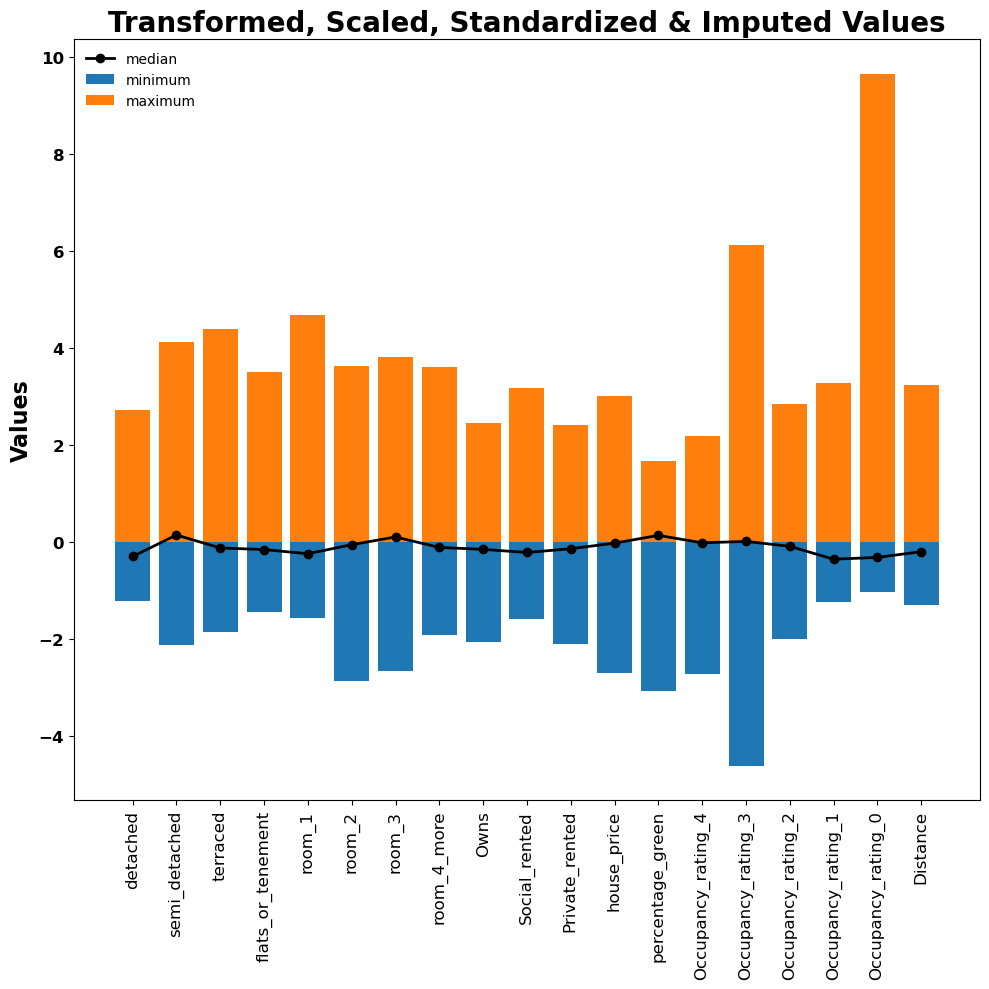

In [150]:
# Graph min, median & max values of each feature after they've been feature engineered
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(hf.describe().columns.tolist(), hf.describe().iloc[5,:], label="median", color="black", linewidth=2, marker="o")
plt.bar(hf.describe().columns.tolist(), hf.describe().iloc[3,:], label="minimum")
plt.bar(hf.describe().columns.tolist(), hf.describe().iloc[-1,:], label="maximum")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, fontweight="bold")
plt.ylabel("Values", fontsize=16, fontweight="bold")
plt.title("Transformed, Scaled, Standardized & Imputed Values", fontsize=20, fontweight="bold")
ax.title.set_position([.5, 1.025])
plt.legend(loc="best", frameon=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 4. Dimensionality Reduction

In [151]:
HF = hf[house_features].values

In [152]:
pca_hf = PCA(random_state=42)
pca_hf.fit(HF)

PCA(random_state=42)

In [153]:
hf_pca = pd.DataFrame({
    "principal_component": range(1, HF.shape[1]+1),
    "explained_variance": pca_hf.explained_variance_ratio_,
    "cumsum_explained_variance": pca_hf.explained_variance_ratio_.cumsum(),
})
hf_pca.loc[-1] = 0
hf_pca.sort_values(by="principal_component", inplace=True)

In [154]:
print(hf_pca.shape)
hf_pca.head()

(20, 3)


principal_component  explained_variance  cumsum_explained_variance
-1                    0            0.000000                   0.000000
 0                    1            0.546100                   0.546100
 1                    2            0.144011                   0.690111
 2                    3            0.099158                   0.789269
 3                    4            0.045804                   0.835074

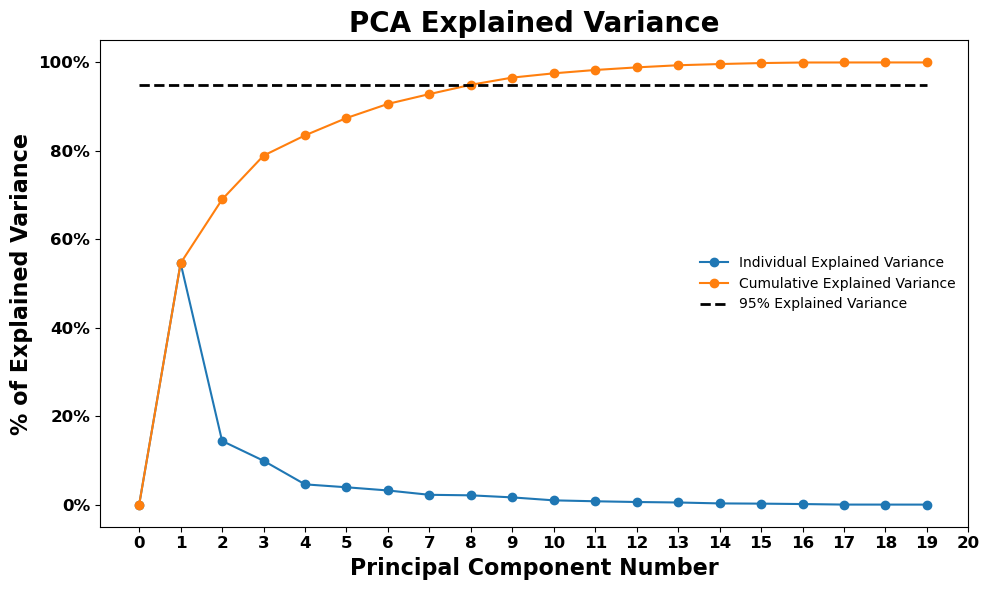

In [155]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(hf_pca["principal_component"], hf_pca["explained_variance"], marker="o", label="Individual Explained Variance")
plt.plot(hf_pca["principal_component"], hf_pca["cumsum_explained_variance"], marker="o", label="Cumulative Explained Variance")
plt.plot(hf_pca["principal_component"], [0.95] * len(hf_pca), color="black", linewidth=2, linestyle="--", label="95% Explained Variance")
ax.set_xticklabels(["{:,.0f}".format(x) for x in ax.get_xticks()])
ax.set_yticklabels(["{:,.0%}".format(x) for x in ax.get_yticks()])
plt.title("PCA Explained Variance", fontsize=20, fontweight="bold")
ax.title.set_position([.5, 1.025])
plt.xticks(range(0,21), range(0,21), fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.xlabel("Principal Component Number", fontsize=16, fontweight="bold")
plt.ylabel("% of Explained Variance", fontsize=16, fontweight="bold")
plt.grid(False)
plt.legend(loc="best", frameon=False)
plt.tight_layout()

save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/PCA_house.png"
plt.savefig(save_path)
plt.show()

In [156]:
n_components_pca = int(hf_pca["cumsum_explained_variance"].gt(0.95).idxmax())
print("# of Features Until 95% Variance is Reached:", n_components_pca)

# of Features Until 95% Variance is Reached: 8


In [157]:
pca_hf = PCA(n_components=n_components_pca, random_state=42)
HF = pca_hf.fit_transform(HF)

In [158]:
print(HF.shape)
HF

(2719, 8)


array([[ 6.08136773,  2.92324118, -3.314122  , ..., -0.85224051,
        -0.12256714,  1.25347975],
       [ 4.53276099, -1.54906502,  1.05608872, ..., -0.32983619,
        -0.17705257, -1.42056298],
       [ 1.91005739, -1.26769548,  2.11722585, ...,  0.64166174,
         0.43062736, -0.98479794],
       ...,
       [ 4.48140453,  1.36297469, -2.44475977, ...,  0.38527615,
         1.59519364,  0.58153134],
       [-0.04835035,  0.6546531 , -2.97442014, ...,  0.71423687,
         1.20499874, -1.45773296],
       [-2.74132437,  0.57093087, -1.23207452, ...,  1.05915144,
         0.0719143 ,  0.57726384]])

## 5. KMeans Clustering

In [159]:
inertia_scores = []
silhouette_scores = []
no_of_clusters = range(2, 22)

In [160]:
for cluster in tqdm(no_of_clusters):
    kmeans = KMeans(n_clusters=cluster, init="k-means++", random_state=42)
    kmeans = kmeans.fit(HF)
    
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(HF, kmeans.labels_)
    
    inertia_scores.append(round(inertia))
    silhouette_scores.append(silhouette_avg)

  0%|          | 0/20 [00:00<?, ?it/s]

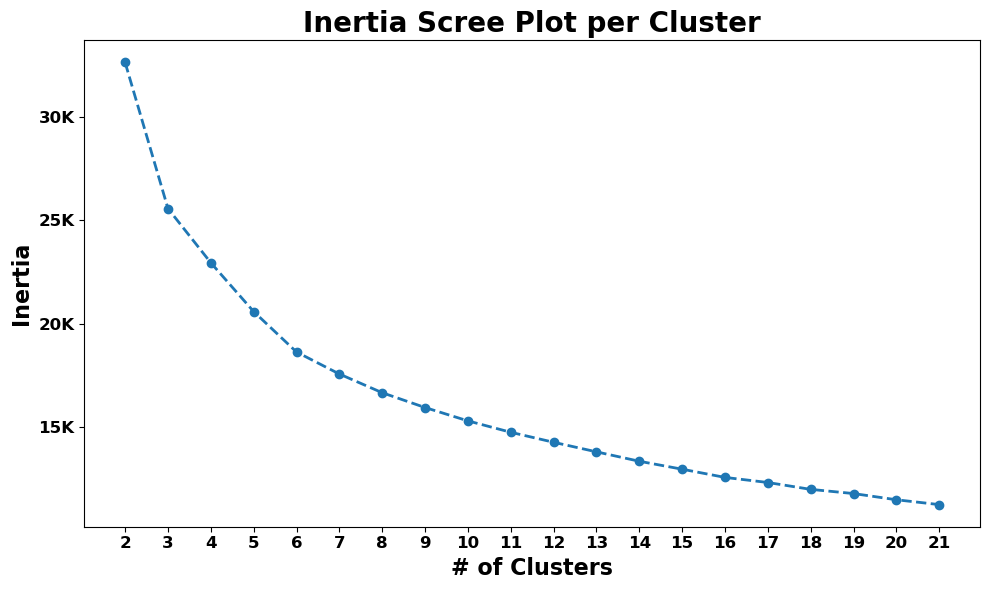

In [161]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(range(1, len(no_of_clusters)+1), inertia_scores, marker="o", linewidth=2, linestyle="--")
plt.xticks(range(1, len(no_of_clusters)+1), no_of_clusters, fontsize=12, fontweight="bold")
ax.set_yticklabels(["{:,.0f}".format(x/1000) + "K" for x in ax.get_yticks()])
plt.yticks(fontsize=12, fontweight="bold")
plt.xlabel("# of Clusters", fontsize=16, fontweight="bold")
plt.ylabel("Inertia", fontsize=16, fontweight="bold")
plt.title("Inertia Scree Plot per Cluster", fontsize=20, fontweight="bold")
ax.title.set_position([.5, 1.025])
plt.grid(False)
plt.tight_layout()
plt.show()

In [162]:
slopes = [0]
slopes_pct_change = []
inertia_df = pd.DataFrame()
inertia_df["inertia"] = inertia_scores
inertia_df["n_clusters"] = inertia_df.index + 2

In [163]:
def derivative_calc(hf, x_field, y_field):
    x_values = hf[x_field].values
    y_values = hf[y_field].values
    for i in range(1, len(x_values)):
        (x1, y1) = (x_values[i-1], y_values[i-1])
        (x2, y2) = (x_values[i], y_values[i])
        slope = round((y2 - y1) / (x2 - x1), 4)
        slopes.append(slope)
        slopes_pct_change.append((abs(slopes[i-1]) - abs(slopes[i])) / abs(slopes[i-1]))
    hf["slopes"] = slopes
    hf["slopes_pct_change"] = slopes_pct_change + [0]

In [164]:
# Define optimal number of clusters
derivative_calc(inertia_df, "n_clusters", "inertia")
n_clusters_kmeans = int(inertia_df.loc[inertia_df["slopes_pct_change"].idxmax()]["n_clusters"])
print("# of Clusters for KMeans Algorithm:", n_clusters_kmeans)

# of Clusters for KMeans Algorithm: 3


In [165]:
kmeans = KMeans(n_clusters=n_clusters_kmeans, init="k-means++", random_state=42)
hf_kmeans = kmeans.fit_predict(HF)

In [166]:
def cluster_cnts(predictions, algorithm):
    
    unique, counts = np.unique(predictions, return_counts=True)
    cluster_cnts_df = pd.DataFrame(counts)
    cluster_cnts_df["ratio"] = round(100 * cluster_cnts_df[0] / cluster_cnts_df[0].sum(), 4)
    cluster_cnts_df = cluster_cnts_df.reset_index()
    cluster_cnts_df.columns = ["cluster", "count", "ratio"]
    
    print(f"Breakdown of Census Tracts in Each {algorithm} Cluster")
    return cluster_cnts_df

In [167]:
cluster_cnts(hf_kmeans, "KMeans")

Breakdown of Census Tracts in Each KMeans Cluster


cluster  count    ratio
0        0   1103  40.5664
1        1    636  23.3910
2        2    980  36.0427

In [168]:
silhouette_kmeans_euclidean = round(silhouette_score(HF, hf_kmeans, metric="euclidean"), 3)
silhouette_kmeans_manhattan = round(silhouette_score(HF, hf_kmeans, metric="manhattan"), 3)
print("Silhouette Score KMeans Euclidean:", silhouette_kmeans_euclidean, "\nSilhouette Score KMeans Manhattan:", silhouette_kmeans_manhattan)


Silhouette Score KMeans Euclidean: 0.283 
Silhouette Score KMeans Manhattan: 0.248


## 6. Cluster Profiles

In [169]:
hf_preprocessed = dataset.set_index('Middle layer Super Output Areas Code').copy()

In [170]:
hf_preprocessed

detached  semi_detached  terraced  \
Middle layer Super Output Areas Code                                      
E02000001                             0.001425       0.003053  0.015873   
E02000002                             0.044948       0.272822  0.282578   
E02000003                             0.044795       0.273607  0.357088   
E02000004                             0.043309       0.388913  0.426592   
E02000005                             0.059261       0.223815  0.575524   
...                                        ...            ...       ...   
E02006629                             0.082702       0.274462  0.342623   
E02006630                             0.047745       0.082007  0.050177   
E02006631                             0.031784       0.059159  0.170862   
E02006632                             0.206578       0.170349  0.129753   
E02006633                             0.505472       0.196196  0.085982   

                                      flats_or_tenement    room_1    room_2  \
Middle layer Super Output Areas Code                                          
E02000001                                      0.869556  0.534283  0.321058   
E02000002                                      0.382927  0.119512  0.379094   
E02000003                                      0.254009  0.110433  0.276081   
E02000004                                      0.116501  0.062338  0.222944   
E02000005                                      0.101433  0.085171  0.353087   
...                                                 ...       ...       ...   
E02006629                                      0.191760  0.178431  0.279006   
E02006630                                      0.541777  0.385721  0.407383   
E02006631                                      0.373507  0.420985  0.344726   
E02006632                                      0.381295  0.147777  0.349268   
E02006633                                      0.174831  0.058640  0.334636   

                                        room_3  room_4_more      Owns  \
Middle layer Super Output Areas Code                                    
E02000001                             0.106205     0.038454  0.367521   
E02000002                             0.410105     0.091289  0.434146   
E02000003                             0.461578     0.151908  0.562341   
E02000004                             0.558442     0.156277  0.675184   
E02000005                             0.463341     0.098401  0.531698   
...                                        ...          ...       ...   
E02006629                             0.412905     0.129658  0.619812   
E02006630                             0.105880     0.101017  0.502765   
E02006631                             0.132488     0.101801  0.437752   
E02006632                             0.283989     0.218967  0.756298   
E02006633                             0.401876     0.204848  0.825951   

                                      Social_rented  Private_rented  \
Middle layer Super Output Areas Code                                  
E02000001                                  0.148555        0.365079   
E02000002                                  0.417770        0.430662   
E02000003                                  0.132824        0.556234   
E02000004                                  0.161542        0.668255   
E02000005                                  0.251378        0.518743   
...                                             ...             ...   
E02006629                                  0.162072        0.615268   
E02006630                                  0.108162        0.497678   
E02006631                                  0.083548        0.432427   
E02006632                                  0.030334        0.751414   
E02006633                                  0.049505        0.823606   

                                      house_price  percentage_green  \
Middle layer Super Output Areas Code                                  
E02000001         

In [171]:
hf_preprocessed["kmeans_pred"] = hf_kmeans

In [172]:
hf_all_kmeans_avgs = hf_preprocessed.groupby("kmeans_pred").mean().reset_index()[["kmeans_pred"] + house_features]

In [173]:
hf_all_kmeans_avgs

kmeans_pred  detached  semi_detached  terraced  flats_or_tenement  \
0            0  0.396834       0.327409  0.151893           0.090196   
1            1  0.038170       0.111241  0.193918           0.480850   
2            2  0.125131       0.299495  0.304947           0.210052   

     room_1    room_2    room_3  room_4_more      Owns  Social_rented  \
0  0.067405  0.215300  0.383858     0.333437  0.769954       0.089016   
1  0.267088  0.344753  0.248095     0.140064  0.368469       0.279359   
2  0.135328  0.280945  0.410699     0.173027  0.587717       0.193026   

   Private_rented    house_price  percentage_green  Occupancy_rating_4  \
0        0.759962  513730.676337          0.919021            0.581183   
1        0.352060  639323.473270          0.763836            0.218437   
2        0.575561  393403.769388          0.892439            0.390877   

   Occupancy_rating_3  Occupancy_rating_2  Occupancy_rating_1  \
0            0.238790            0.147633            0.028213   
1            0.227790            0.362647            0.150874   
2            0.268601            0.257281            0.068994   

   Occupancy_rating_0  Distance  
0            0.004169  0.037052  
1            0.040264  0.007716  
2            0.014220  0.019232

In [174]:
def plot_bar(hf, group_col):
    fig, ax = plt.subplots(figsize=(20, 20))
    for idx, f in enumerate(hf.columns[1:]):
        ax1 = plt.subplot(4, 5, idx+1)
        plt.bar(hf[group_col], hf[f], alpha=0.8)
        plt.ylim(hf[f].min() * 0.8, hf[f].max() * 1.2)
        plt.title(f, fontsize=18, fontweight="bold")
        plt.xticks(hf["kmeans_pred"])
        plt.grid(False)
    
        labels = round(hf[f], 2).values.tolist()
        for rect, label in zip(ax1.patches, labels):
            height = rect.get_height()
            ax1.text(rect.get_x() + rect.get_width() / 2, height + 0.001, label, ha="center", va="bottom")
    plt.tight_layout()

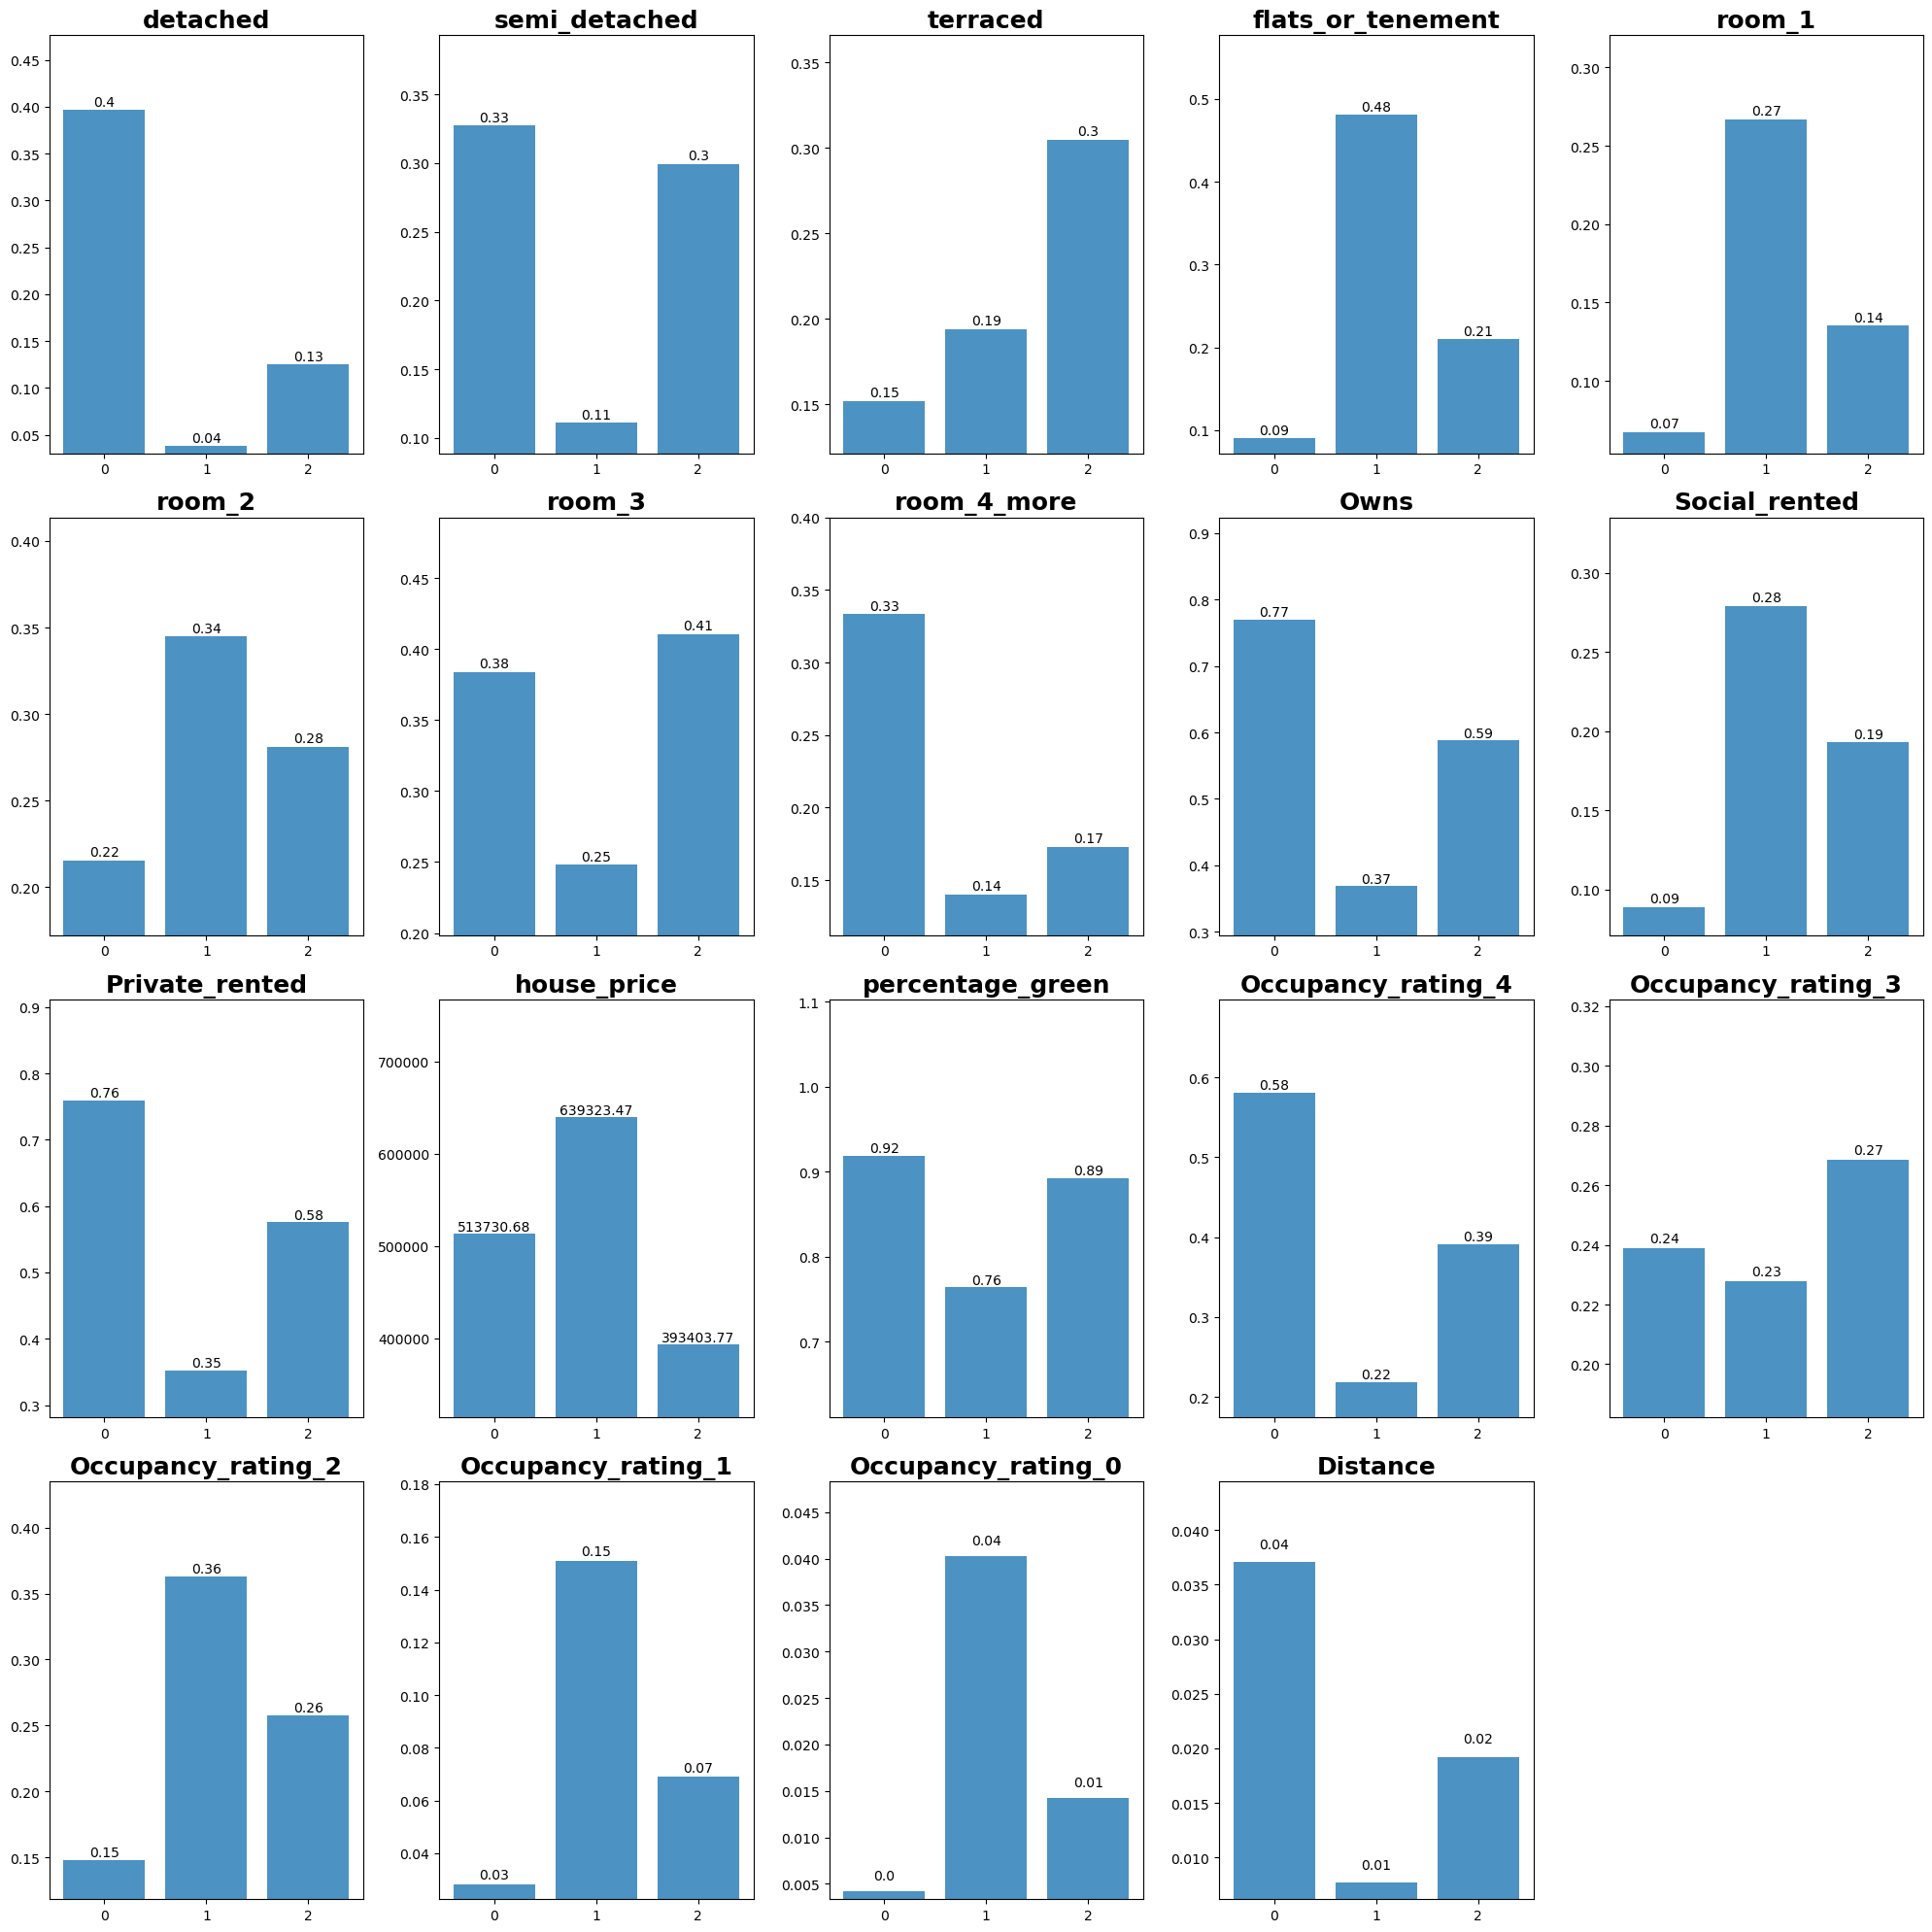

In [175]:
save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/Cluster_profile_house.png"

plot_bar(hf_all_kmeans_avgs, "kmeans_pred")
plt.savefig(save_path)
plt.show()

## 7. Visualisation

In [176]:
gpd

<module 'geopandas' from '/Users/yobin/opt/anaconda3/lib/python3.9/site-packages/geopandas/__init__.py'>

In [177]:
hf_mapping = pd.merge(shp, hf_preprocessed, left_on='MSOA21CD', right_on='Middle layer Super Output Areas Code', how='inner').reset_index()
hf_mapping.shape

(2719, 25)

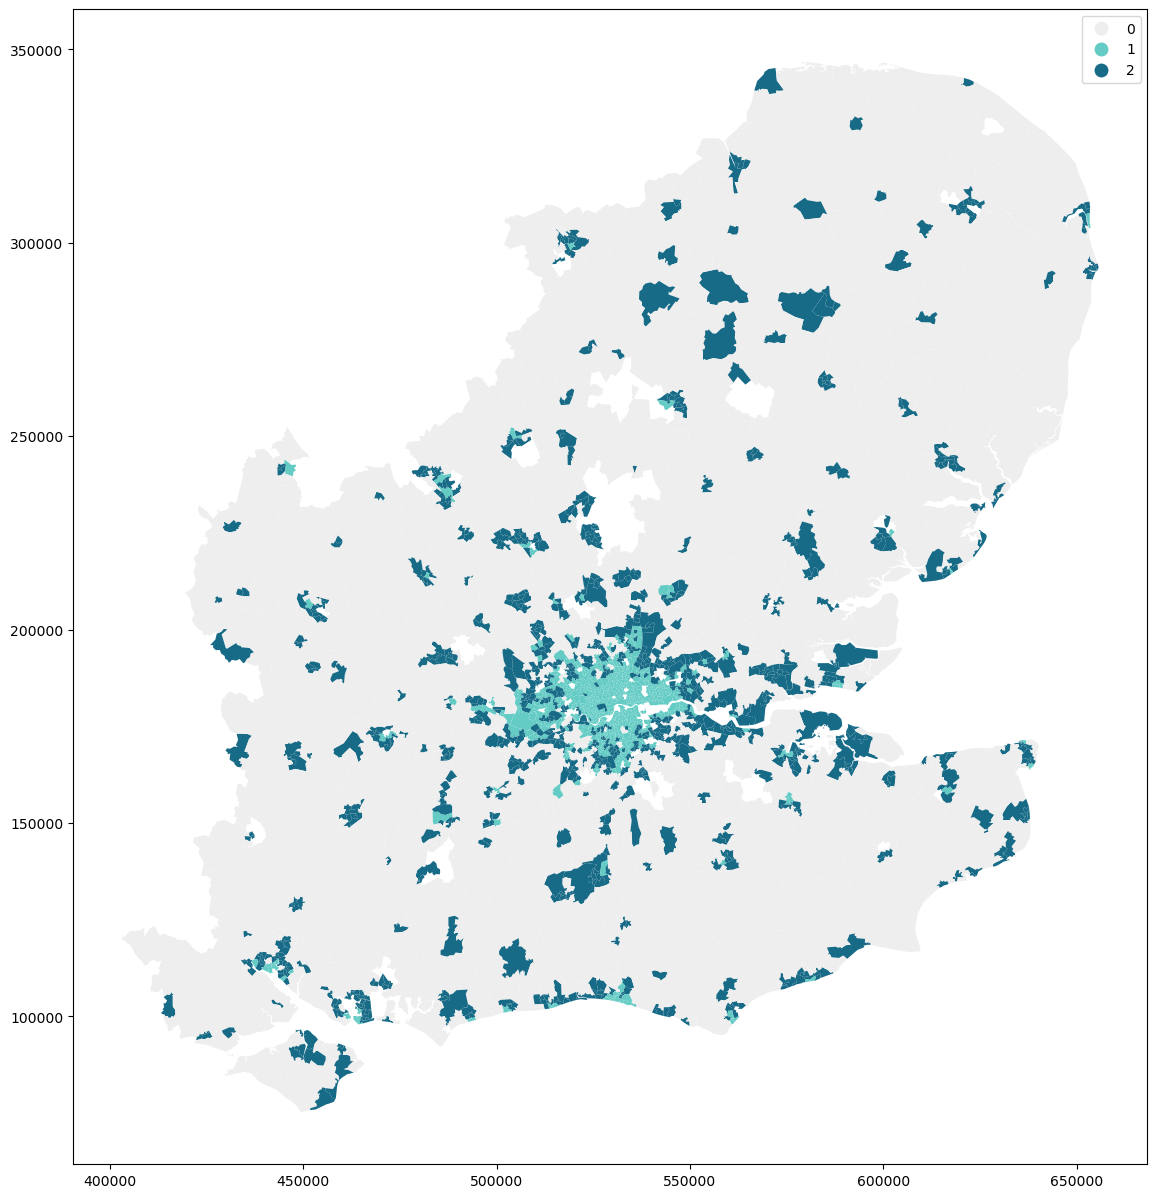

In [178]:
import matplotlib.colors as mcolors

colors = ['#EEEEEE', '#64CCC5','#176B87']
cmap_custom = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=len(colors))

def mapping_clusters(labels_cluster):
    hf_mapping['kmeans_pred'] = labels_cluster
    hf_mapping.plot(column='kmeans_pred', categorical=True, legend=True, figsize=(15,15), cmap=cmap_custom);

mapping_clusters(hf_kmeans)

save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/map_house.png"
plt.savefig(save_path)

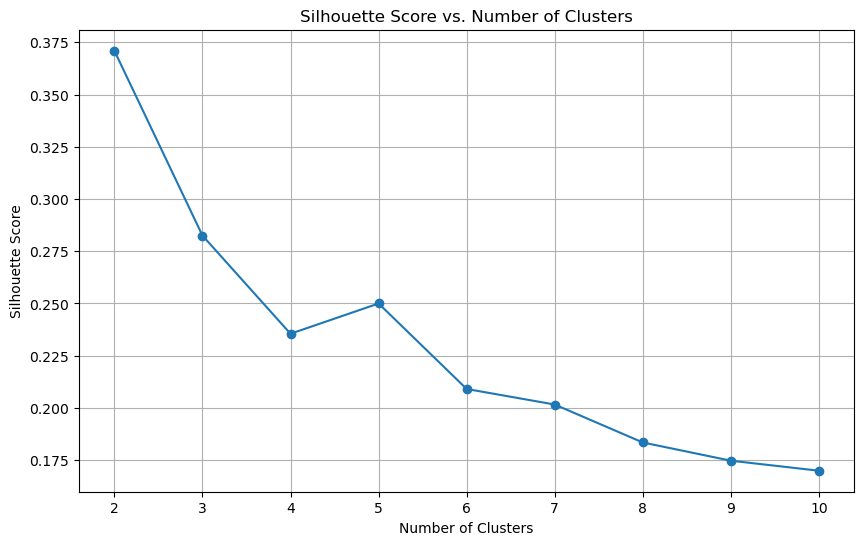

In [179]:
silhouette_scores = []

cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
    hf_kmeans = kmeans.fit_predict(HF)
    silhouette_avg = silhouette_score(HF, hf_kmeans)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)

save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/ss_house.png"
plt.savefig(save_path)

plt.show()

# 

# Chi-square Test

In [180]:
kmeans_result1 = df_preprocessed.copy()

In [181]:
kmeans_result1 = kmeans_result1.rename(columns={'kmeans_pred': 'Cluster_Label1'})
kmeans_result1.head(3)

distance_less_than_10km  \
Middle layer Super Output Areas Code                            
E02000001                                            0.151748   
E02000002                                            0.124260   
E02000003                                            0.126061   

                                      distance_10km_to_30km  \
Middle layer Super Output Areas Code                          
E02000001                                          0.011305   
E02000002                                          0.080787   
E02000003                                          0.101369   

                                      distance_30km_to_60km  \
Middle layer Super Output Areas Code                          
E02000001                                          0.001865   
E02000002                                          0.010264   
E02000003                                          0.006758   

                                      distance_more_than_60km  \
Middle layer Super Output Areas Code                            
E02000001                                            0.003263   
E02000002                                            0.003140   
E02000003                                            0.003812   

                                      Works_from_home    Female      Male  \
Middle layer Super Output Areas Code                                        
E02000001                                    0.419814  0.449843  0.550157   
E02000002                                    0.081874  0.526748  0.473252   
E02000003                                    0.115751  0.505458  0.494542   

                                      Age_16_to_24  Age_25_to_34  \
Middle layer Super Output Areas Code                               
E02000001                                 0.133869      0.258068   
E02000002                                 0.109045      0.143099   
E02000003                                 0.114028      0.160211   

                                      Age_35_to_49  ...  Managers_directors  \
Middle layer Super Output Areas Code                ...                       
E02000001                                 0.211698  ...            0.128701   
E02000002                                 0.215071  ...            0.033442   
E02000003                                 0.215579  ...            0.044360   

                                      Professional_occupations  \
Middle layer Super Output Areas Code                             
E02000001                                             0.273840   
E02000002                                             0.064349   
E02000003                                             0.079016   

                                      Technical_occupations  \
Middle layer Super Output Areas Code                          
E02000001                                          0.119725   
E02000002                                          0.037185   
E02000003                                          0.046699   

                                      Secretarial_occupations  \
Middle layer Super Output Areas Code                            
E02000001                                            0.031126   
E02000002                                            0.035977   
E02000003                                            0.049125   

                                      Skilled_trades_occupations  \
Middle layer Super Output Areas Code                               
E02000001                                               0.011308   
E02000002                                               0.049982   
E02000003                                               0.050251   

                                      Service_occupations  Sales_occupations  \
Middle layer Super Output Areas Code                                           
E02000001                                        0.017720           0.014222   
E02000002                                        0.045636           0.030665 

In [182]:
kmeans_result2 = hf_preprocessed.copy()

In [183]:
kmeans_result2 = kmeans_result2.rename(columns={'kmeans_pred': 'Cluster_Label2'})
kmeans_result2.head(3)

detached  semi_detached  terraced  \
Middle layer Super Output Areas Code                                      
E02000001                             0.001425       0.003053  0.015873   
E02000002                             0.044948       0.272822  0.282578   
E02000003                             0.044795       0.273607  0.357088   

                                      flats_or_tenement    room_1    room_2  \
Middle layer Super Output Areas Code                                          
E02000001                                      0.869556  0.534283  0.321058   
E02000002                                      0.382927  0.119512  0.379094   
E02000003                                      0.254009  0.110433  0.276081   

                                        room_3  room_4_more      Owns  \
Middle layer Super Output Areas Code                                    
E02000001                             0.106205     0.038454  0.367521   
E02000002                             0.410105     0.091289  0.434146   
E02000003                             0.461578     0.151908  0.562341   

                                      Social_rented  Private_rented  \
Middle layer Super Output Areas Code                                  
E02000001                                  0.148555        0.365079   
E02000002                                  0.417770        0.430662   
E02000003                                  0.132824        0.556234   

                                      house_price  percentage_green  \
Middle layer Super Output Areas Code                                  
E02000001                                937692.0              0.07   
E02000002                                337826.0              0.77   
E02000003                                369964.0              0.86   

                                      Occupancy_rating_4  Occupancy_rating_3  \
Middle layer Super Output Areas Code                                           
E02000001                                       0.126781            0.250509   
E02000002                                       0.190244            0.242857   
E02000003                                       0.339695            0.241730   

                                      Occupancy_rating_2  Occupancy_rating_1  \
Middle layer Super Output Areas Code                                           
E02000001                                       0.453602            0.158730   
E02000002                                       0.353659            0.169338   
E02000003                                       0.266667            0.108651   

                                      Occupancy_rating_0  Distance  \
Middle layer Super Output Areas Code                                 
E02000001                                       0.010379  0.003245   
E02000002                                       0.043902  0.023281   
E02000003                                       0.043257  0.014669   

                                      Cluster_Label2  
Middle layer Super Output Areas Code                  
E02000001                                          1  
E02000002                                          1  
E02000003                                          2

In [184]:
kmeans_result1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2867 entries, E02000001 to E02007116
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   distance_less_than_10km     2867 non-null   float64
 1   distance_10km_to_30km       2867 non-null   float64
 2   distance_30km_to_60km       2867 non-null   float64
 3   distance_more_than_60km     2867 non-null   float64
 4   Works_from_home             2867 non-null   float64
 5   Female                      2867 non-null   float64
 6   Male                        2867 non-null   float64
 7   Age_16_to_24                2867 non-null   float64
 8   Age_25_to_34                2867 non-null   float64
 9   Age_35_to_49                2867 non-null   float64
 10  Age_50_to_64                2867 non-null   float64
 11  Age_65_and_over             2867 non-null   float64
 12  Asian                       2867 non-null   float64
 13  Black                    

In [185]:
kmeans_result2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2719 entries, E02000001 to E02006633
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   detached            2719 non-null   float64
 1   semi_detached       2719 non-null   float64
 2   terraced            2719 non-null   float64
 3   flats_or_tenement   2719 non-null   float64
 4   room_1              2719 non-null   float64
 5   room_2              2719 non-null   float64
 6   room_3              2719 non-null   float64
 7   room_4_more         2719 non-null   float64
 8   Owns                2719 non-null   float64
 9   Social_rented       2719 non-null   float64
 10  Private_rented      2719 non-null   float64
 11  house_price         2719 non-null   float64
 12  percentage_green    2719 non-null   float64
 13  Occupancy_rating_4  2719 non-null   float64
 14  Occupancy_rating_3  2719 non-null   float64
 15  Occupancy_rating_2  2719 non-null   float64
 16

In [186]:
merged_data = kmeans_result2.merge(kmeans_result1[['Cluster_Label1']], left_index=True, right_index=True)
merged_data.head(5)


detached  semi_detached  terraced  \
Middle layer Super Output Areas Code                                      
E02000001                             0.001425       0.003053  0.015873   
E02000002                             0.044948       0.272822  0.282578   
E02000003                             0.044795       0.273607  0.357088   
E02000004                             0.043309       0.388913  0.426592   
E02000005                             0.059261       0.223815  0.575524   

                                      flats_or_tenement    room_1    room_2  \
Middle layer Super Output Areas Code                                          
E02000001                                      0.869556  0.534283  0.321058   
E02000002                                      0.382927  0.119512  0.379094   
E02000003                                      0.254009  0.110433  0.276081   
E02000004                                      0.116501  0.062338  0.222944   
E02000005                                      0.101433  0.085171  0.353087   

                                        room_3  room_4_more      Owns  \
Middle layer Super Output Areas Code                                    
E02000001                             0.106205     0.038454  0.367521   
E02000002                             0.410105     0.091289  0.434146   
E02000003                             0.461578     0.151908  0.562341   
E02000004                             0.558442     0.156277  0.675184   
E02000005                             0.463341     0.098401  0.531698   

                                      Social_rented  ...  house_price  \
Middle layer Super Output Areas Code                 ...                
E02000001                                  0.148555  ...     937692.0   
E02000002                                  0.417770  ...     337826.0   
E02000003                                  0.132824  ...     369964.0   
E02000004                                  0.161542  ...     411582.0   
E02000005                                  0.251378  ...     338313.0   

                                      percentage_green  Occupancy_rating_4  \
Middle layer Super Output Areas Code                                         
E02000001                                         0.07            0.126781   
E02000002                                         0.77            0.190244   
E02000003                                         0.86            0.339695   
E02000004                                         0.93            0.423993   
E02000005                                         0.95            0.259372   

                                      Occupancy_rating_3  Occupancy_rating_2  \
Middle layer Super Output Areas Code                                           
E02000001                                       0.250509            0.453602   
E02000002                                       0.242857            0.353659   
E02000003                                       0.241730            0.266667   
E02000004                                       0.269814            0.209181   
E02000005                                       0.283352            0.295204   

                                      Occupancy_rating_1  Occupancy_rating_0  \
Middle layer Super Output Areas Code                                           
E02000001                                       0.158730            0.010379   
E02000002                                       0.169338            0.043902   
E02000003                                       0.108651            0.043257   
E02000004                                       0.077956            0.019056   
E02000005                                       0.119350            0.042723   

                                      Distance  Cluster_Label2  Cluster_Label1  
Middle layer Super Output Areas Code                                            
E02000001                             0.003245               1               0  
E02000002             

In [187]:
cross_table = pd.crosstab(merged_data['Cluster_Label1'], merged_data['Cluster_Label2'])


In [188]:
import scipy.stats as stats
chi2, p, _, _ = stats.chi2_contingency(cross_table)

In [189]:

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 1191.0327164782914
P-value: 1.400083996323575e-256


In [190]:
alpha = 0.05
if p < alpha:
    print("There is a significant correlation")
else:
    print("There is no significant correlation")


There is a significant correlation


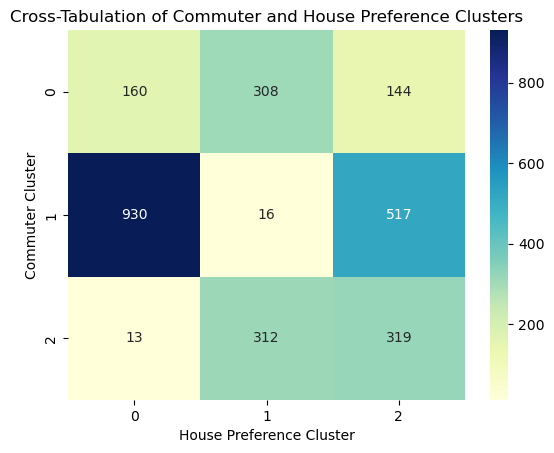

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cross_table, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("House Preference Cluster")
plt.ylabel("Commuter Cluster")
plt.title("Cross-Tabulation of Commuter and House Preference Clusters")
save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/Cluster_corr.png"
plt.savefig(save_path)
plt.show()

In [192]:
n = np.min(cross_table.shape)
cramer_v = np.sqrt(chi2 / (len(data) * (n - 1)))

print("Cramer's V:", cramer_v)

Cramer's V: 0.4557566364830486
